### Scenario 1: 
The National Football League (NFL) records a variety of performance data for individuals and
teams. To investigate the importance of passing on the percentage of games won by a team,
the following data show the conference (Conf), an average number of passing yards per
attempt (Yds/Att), the number of interceptions thrown per attempt (Int/Att), and the percentage
of games won (Win%) for a random sample of 16 NFL teams for the 2011 season (NFL web
site).

### 1.3.1 Developing the Estimated Multiple Linear Regression Equation
Develop the estimated regression equation that could be used to predict the percentage of games won, given the average number of passing yards per attempt and the number of interceptions thrown per attempt. What percentage of variation in the sample values of the percentage of games won does this model explain?

In [1]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import statsmodels as sm
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
NFLPassing = pd.read_csv('data/NFLPassing.csv', index_col=0)
NFLPassing['intercept'] = 1
lm_passing3 = sm.OLS(NFLPassing['Win_Pct'], NFLPassing[['Yds_Att', 'Int_Att', 'intercept']]).fit()
print(lm_passing3.summary())

                            OLS Regression Results                            
Dep. Variable:                Win_Pct   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     22.41
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           4.32e-05
Time:                        07:18:13   Log-Likelihood:                -64.918
No. Observations:                  17   AIC:                             135.8
Df Residuals:                      14   BIC:                             138.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Yds_Att       12.9495      3.060      4.232      0.0

C:\Users\vreed\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


### 1.3.2 Developing the Estimated Simple Linear Regression Equation

Develop the estimated regression equation that could be used to predict the percentage of
games won, given the number of interceptions thrown per attempt. What percentage of
variation in the sample values of the percentage of games won does this model explain?

In [4]:
# Predictor variable -> Interceptions
lm_passing2 = sm.OLS(NFLPassing['Win_Pct'], NFLPassing[['Int_Att', 'intercept']]).fit()
print(lm_passing2.summary())

                            OLS Regression Results                            
Dep. Variable:                Win_Pct   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     12.65
Date:                Sun, 11 Jul 2021   Prob (F-statistic):            0.00287
Time:                        07:18:13   Log-Likelihood:                -71.921
No. Observations:                  17   AIC:                             147.8
Df Residuals:                      15   BIC:                             149.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Int_Att    -1625.4170    457.011     -3.557      0.0

### 1.3.3 Developing the Estimated Simple Linear Regression Equation
Develop the estimated regression equation that could be used to predict the percentage of
games won, given the average number of passing yards per attempt. What proportion of
variation in the sample values of the percentage of games won does this model explain?

In [5]:
# Predictor variable -> Yards attempted
lm_passing = sm.OLS(NFLPassing['Win_Pct'], NFLPassing[['Yds_Att', 'intercept']]).fit()
print(lm_passing.summary())

                            OLS Regression Results                            
Dep. Variable:                Win_Pct   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     21.38
Date:                Sun, 11 Jul 2021   Prob (F-statistic):           0.000331
Time:                        07:18:13   Log-Likelihood:                -69.589
No. Observations:                  17   AIC:                             143.2
Df Residuals:                      15   BIC:                             144.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Yds_Att       16.6541      3.602      4.624      0.0

### 1.3.4 Using the Estimated Regression

The average number of passing yards per attempt for the Kansas City Chiefs during the 2011
season was 6.2, and the team's number of interceptions thrown per attempt was 0.036. Use the
estimated regression equation developed in the previous part to predict the percentage of
games won by the Kansas City Chiefs during the 2011 season. Compare your prediction to the
actual percentage of games won by the Kansas City Chiefs. (Note: for the 2011 season the
Kansas City Chiefs record was seven wins and nine losses.) Did the estimated regression
equation that uses only the average number of passing yards per attempt as the independent
variable to predict the percentage of games won provide a good fit?

In [6]:
# Using the estimated regression equation developed in 1.3, the predicted percentage of games
# won by the Kansas City Chiefs for the 2011 season (during which the Kansas City Chiefs
# average number of passing yards per attempt was 6.2 and the number of interceptions thrown
# per attempt was 0.036) is
# Y' = -5.763 + 12.949(6.2) - 1083.788(0.036) = 35.5064 or 35.51%.
# During the 2011 season, the Kansas City Chiefs won 43.75% of its games (recall the team's
# record for the 2011 season was 7 wins and 9 loses, and so the team performed better than
# what we would predict for a team with an average number of passing yards per attempt of 6.2
# and number of interceptions thrown per attempt of 0.036).

# The estimated simple linear regression equation that uses only the average number of passing
# yards per attempt as the independent variable to predict the percentage of games won has a
# coefficient of determination of R2 = 0.5771, and the estimated multiple linear regression
# equation that uses both the average number of passing yards per attempt and the number of
# interceptions thrown per attempt as the independent variable to predict the percentage of
# games won has a coefficient of determination of R2 = 0.7525. The multiple linear regression
# model fits the data better, as it explains over 17% more variation in the percentage of games
# won than did the simple linear regression.

"""Y = B0 + B1X1 - B2X2)
where: Y or Win_Pct = ?
       B0 = -5.763
       X1 or Yds_Att = 6.2 
       X2 or Int_Att = 0.036
       """
print(-5.763 + 12.949 * 6.2 - 1083.788 * 0.036)

35.504431999999994


### Scenario 2

Johnson Filtration, Inc. provides maintenance service for water filtration systems throughout
southern Florida. Customers contact Johnson with requests for maintenance service on their
water filtration systems period to estimate the service time and the service calls. Johnson's
managers want to predict the repair time necessary for each maintenance request. Hence,
repair time in hours is the dependent variable. Repair time is believed to be related to three
factors: the number of months since the last maintenance service, the type of repair problem
(mechanical or electrical), and the repair person who performs the repair (Donna Newton or
Bob Jones). Data for a sample of 10 service calls are reported in the following data file.

### 2.3.1 Testing the Hypotheses of No Relationship Between Repair Time and the Number of Months

Before testing the hypotheses of no relationship between repair time and the number of months
since the last maintenance service, check the conditions necessary for valid inference in
regression. If valid, what is the interpretation of this relationship? What does the coefficient of
determination tell you about this model?
<br> (Hint: you can use seaborn.scatterplot to graph the comparison of the predictor to the residuals.
The residuals should be calculated first from the previous regression model.)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


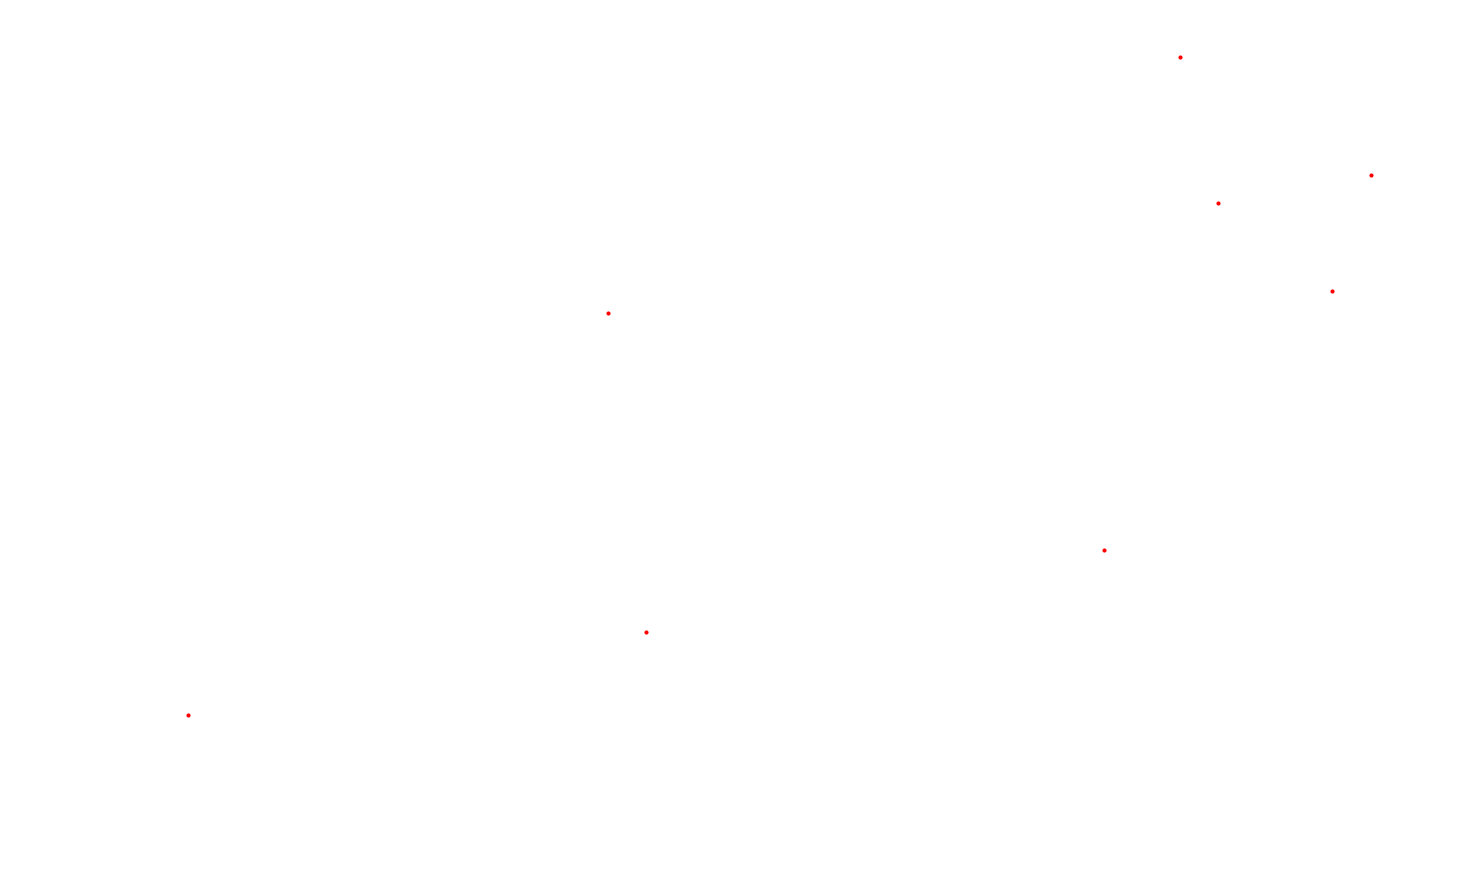

In [7]:
"""
Y = B0 + B1X1 + B2X2 + B3X3
where:  Y or repair time in hours = ?
        B0 or y-intercept = 1
        X1 = # of months since last maintenance service
        X2 = type of repair problem (mechanical or electrical)
        X3 = person who performs repair (Donna Newton or Bob Jones)
"""

# Because we are working with only 10 observations, assessing the conditions necessary for
# inference to be valid in regression is extremely difficult. However, this scatter chart does not
# provide strong evidence of a violation of the conditions, so we will proceed with our inference.
# Since the level of significance for use in hypothesis testing has not been given, we will use the
# standard 0.05 level throughout this problem.
# The p-value associated with the estimated regression parameter b1 is 0.0163. Because this pvalue is less than the 0.05 level of significance, we reject the hypothesis that b1 = 0. We
# conclude that there is a relationship between repair time and the number of months since the
# last maintenance service at the 0.05 level of significance, and our best estimate is that a onemonth increase in the number of months since the last maintenance service corresponds to an
# increase of 0.3041 hours in repair time.
# The coefficient of determination R2 is 0.5342, so the regression model explains approximately
# 53% of the variation in the values of repair time in the sample

Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
lm_Repair = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'intercept']]).fit()
residuals = Repair['Repair_time'] - lm_Repair.predict(Repair[['Months_Last', 'intercept']])
sns.scatterplot(x=Repair['Repair_time'], y=residuals, color='red')
plt.show();

### 2.3.2 Developing the Simple Linear Regression Equation
Develop the simple linear regression equation to predict repair time given the number of
months since the last maintenance service, and use the results to test the hypothesis that no
relationship exists between repair time and the number of months since the last maintenance
service at the 0.05 level of significance. What is the interpretation of this relationship? What
does the coefficient of determination tell you about this model?

In [8]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
lm_Repair = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'intercept']]).fit()
print(lm_Repair.summary())

                            OLS Regression Results                            
Dep. Variable:            Repair_time   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     9.174
Date:                Sun, 11 Jul 2021   Prob (F-statistic):             0.0163
Time:                        07:18:14   Log-Likelihood:                -10.602
No. Observations:                  10   AIC:                             25.20
Df Residuals:                       8   BIC:                             25.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Months_Last     0.3041      0.100      3.029      

C:\Users\vreed\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### The estimated simple linear regression equation is Y' = 2.1473 + 0.3041(Months_Last)

### 2.3.3 Calculating the Predicted Repair Time & Residual
Using the simple linear regression model developed in the previous part, calculate the predicted
repair time and residual for each of the 10 repairs in the data. Sort the data in ascending order
by the value of the residual. Do you see any pattern in the residuals for the two types of
repairs? Do you see any pattern in the residuals for the two repairpersons? Do these results
suggest any potential modifications to your simple linear regression model? Now create a
scatter chart with months since the last service on the X-axis and repair time and hours on the
Y-axis for which the points representing electrical and mechanical repairs are shown in different
shapes and or colors. Create a similar scatterplot of months since last service and repair time in
hours for which the points representing repairs by Bob Jones or Donna Newton are shown in
different shapes and colors. Do these charts and the results of your residual analysis suggest
the same potential modification to your simple linear regression model?

In [9]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
lm_Repair = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'intercept']]).fit()
residuals = Repair['Repair_time'] - lm_Repair.predict(Repair[['Months_Last', 'intercept']])
Repair['predicted'] = lm_Repair.predict(Repair[['Months_Last', 'intercept']])
Repair['residuals'] = residuals
print(Repair.sort_values('residuals'))

   Repair_time  Months_Last Type_repair  Repairperson  intercept  predicted  \
3          1.8            3  Mechanical  Donna Newton          1   3.059669   
1          3.0            6  Mechanical  Donna Newton          1   3.972066   
6          4.2            9  Mechanical     Bob Jones          1   4.884463   
0          2.9            2  Electrical  Donna Newton          1   2.755537   
4          2.9            2  Electrical  Donna Newton          1   2.755537   
2          4.8            8  Electrical     Bob Jones          1   4.580331   
7          4.8            8  Mechanical     Bob Jones          1   4.580331   
9          4.5            6  Electrical  Donna Newton          1   3.972066   
5          4.9            7  Electrical     Bob Jones          1   4.276198   
8          4.4            4  Electrical     Bob Jones          1   3.363802   

   residuals  
3  -1.259669  
1  -0.972066  
6  -0.684463  
0   0.144463  
4   0.144463  
2   0.219669  
7   0.219669  
9   0.5279

### 2.3.4 Constructing a Scatterplot of Months
Construct a scatterplot of months since last service and repair time in hours. In addition,
construct the plot for which the points representing electrical and mechanical repairs are shown
with different shapes and colors.

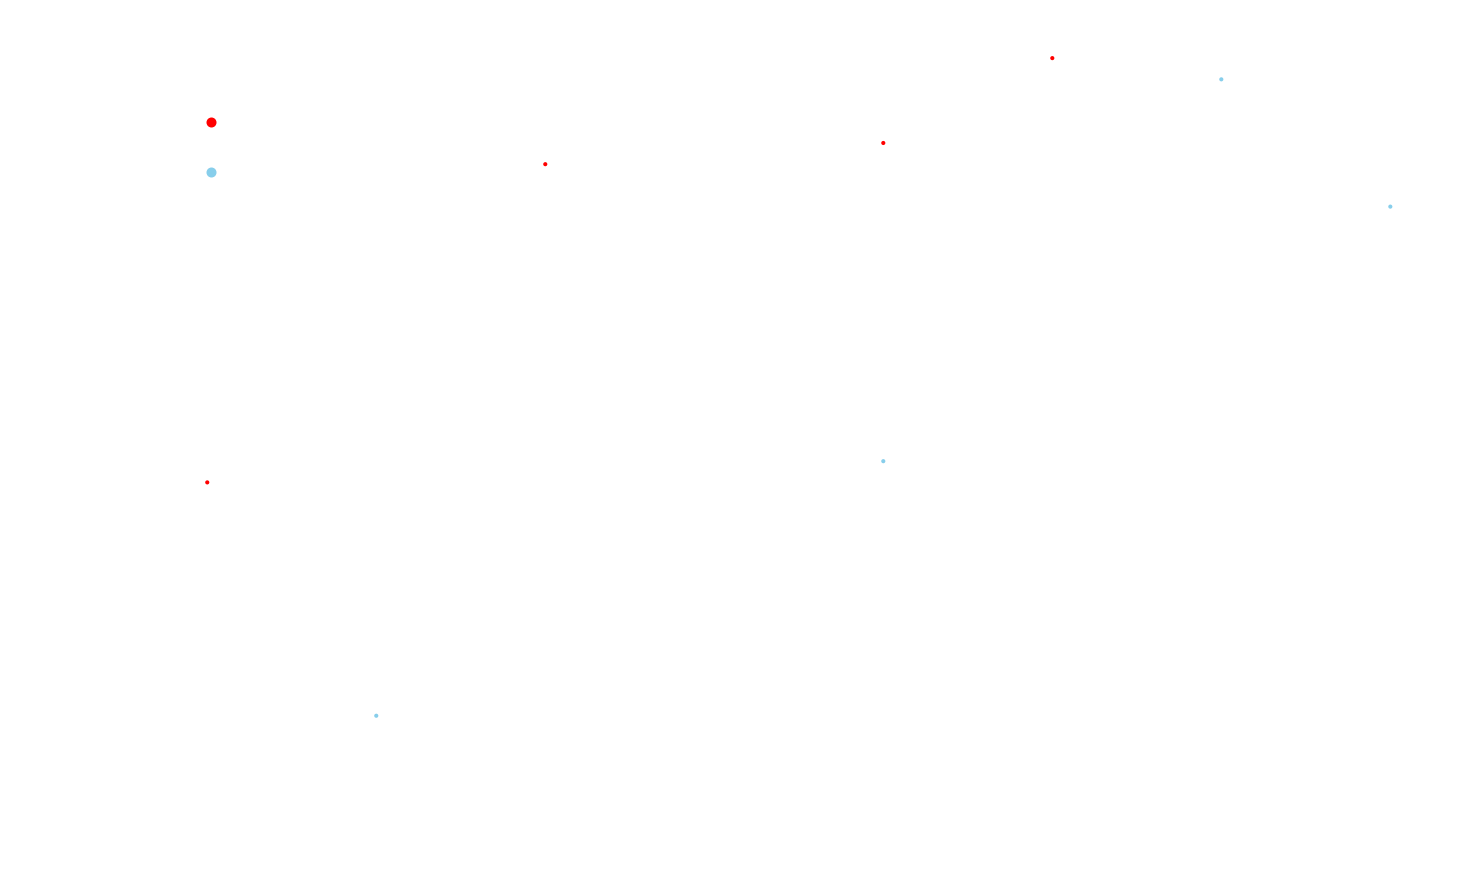

In [10]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
lm_Repair = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'intercept']]).fit()
sns.scatterplot(x = 'Months_Last', y = 'Repair_time', data=Repair, hue = 'Type_repair', palette = ['red', 'skyblue'])
plt.show();

### 2.3.5 Constructing a Scatterplot of Months¶
Construct a scatterplot of months since last service and repair time in hours. In addition, construct the plot for which the points representing repairs by Bob Jones and Donna Newton are shown with different shapes and colors

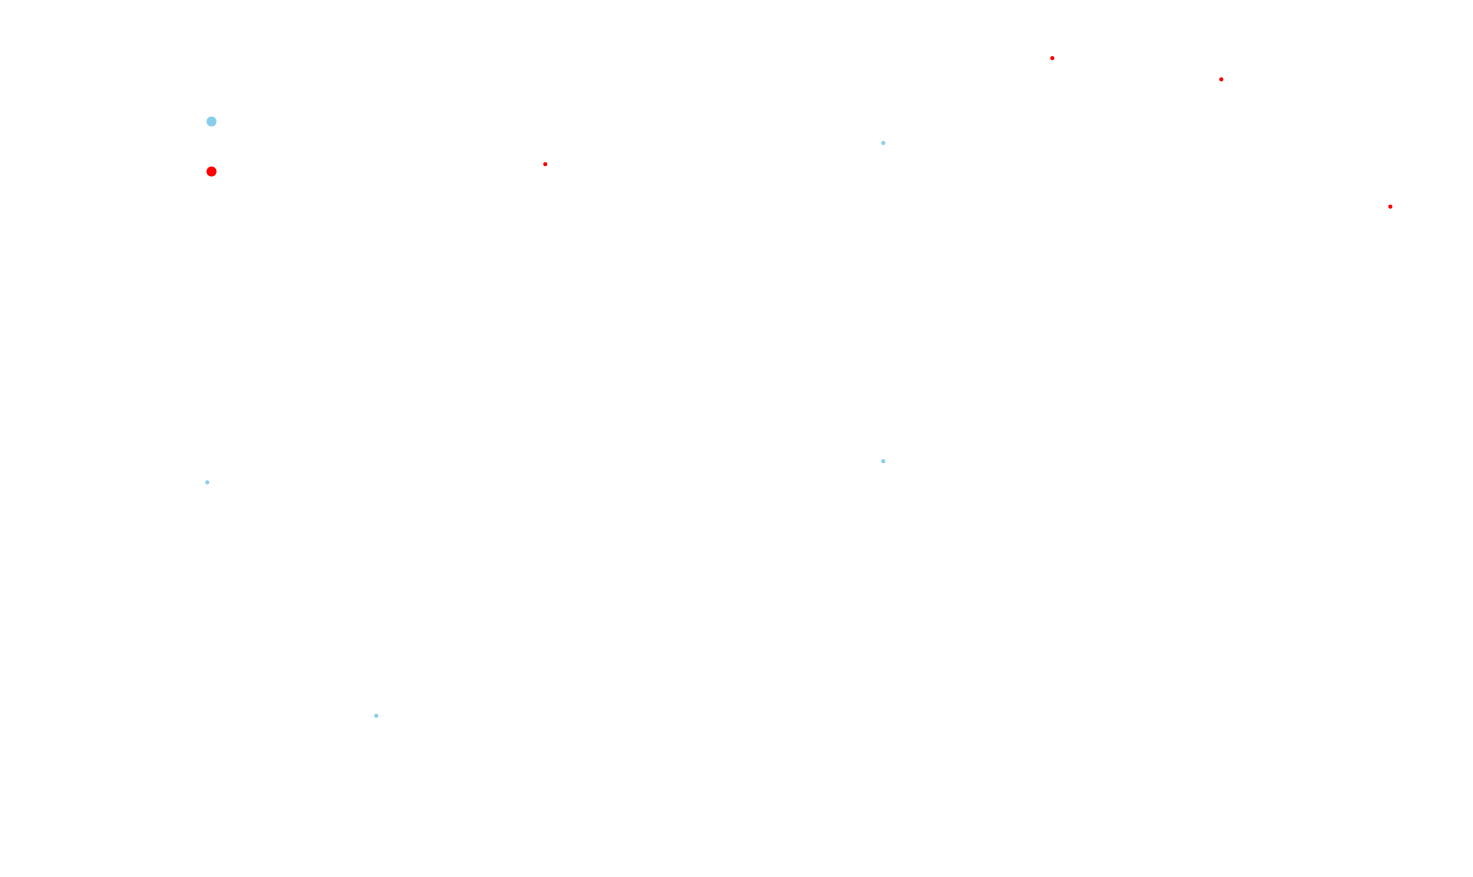

In [11]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
lm_Repair = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'intercept']]).fit()
sns.scatterplot(x = 'Months_Last', y = 'Repair_time', data = Repair, hue = 'Repairperson', palette = ['skyblue', 'red'])
plt.show();

### 2.3.6 Developing the Multiple Regression Equation
Create a new dummy variable that is equal to zero if the type of repair is mechanical and one if
the type of repair is electrical. Develop the multiple regression equation to predict repair time,
given the number of months since the last maintenance service and the type of repair period.

In [12]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Type_dummyElectrical'] = [1 if v == 'Electrical' else 0 for v in Repair['Type_repair']]
lm_Repair2 = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'Type_dummyElectrical', 'intercept']]).fit()
print(lm_Repair2.summary())

                            OLS Regression Results                            
Dep. Variable:            Repair_time   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     21.36
Date:                Sun, 11 Jul 2021   Prob (F-statistic):            0.00105
Time:                        07:18:14   Log-Likelihood:                -4.6200
No. Observations:                  10   AIC:                             15.24
Df Residuals:                       7   BIC:                             16.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Months_Last              0.3876 

C:\Users\vreed\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


### 2.3.7 Testing the Hypotheses of No Relationship Between Repair Time and the Independent Variables
Before testing the hypotheses of no relationship between repair time and the independent
variables in this model, check the conditions necessary for valid inference in regression. If valid,
what are the interpretations of the estimated regression parameters? What does the coefficient
of determination tell you about this model?

### Explanation
Because we are working with only 10 observations, assessing the conditions necessary for
inference to be valid in regression is extremely difficult. However, these scatter charts do not
provide strong evidence of a violation of the conditions. We also note that the parameter
estimate and associated p-value corresponding to months since the last service do not change
substantially when the dummy variable for the type of repair is introduced into the model. This
suggests that multicollinearity is not an issue for this regression model. We will therefore
proceed with our inferences.
The p-value associated with the estimated regression parameter b1 is 0.0004. Because this pvalue is less than the 0.05 level of significance, we reject the hypothesis that beta1 = 0. We
conclude that there is a relationship between the number of months since the last maintenance
service and repair time at the 0.05 level of significance. We estimate that holding the type of
repair constant, a one-month increase in the number of months since the last maintenance
service corresponds with an increase of 0.3876 hours in repair time.
The p-value associated with the estimated regression parameter b2 is 0.0051. Because this pvalue is less than the 0.05 level of significance, we reject the hypothesis that beta2 = 0. We
conclude that there is a relationship between the type of repair and repair time at the 0.05 level
of significance. We estimate that holding the number of months since the last maintenance
service constant, an electrical repair takes 1.2627 hours longer than a mechanical repair.
The y-intercept for this model has been estimated through extrapolation and so does not have a
meaningful interpretation.
The coefficient of determination is R2 = 0.8592, so the regression model explains
approximately 86% of the variation in the values of repair time in the sample.

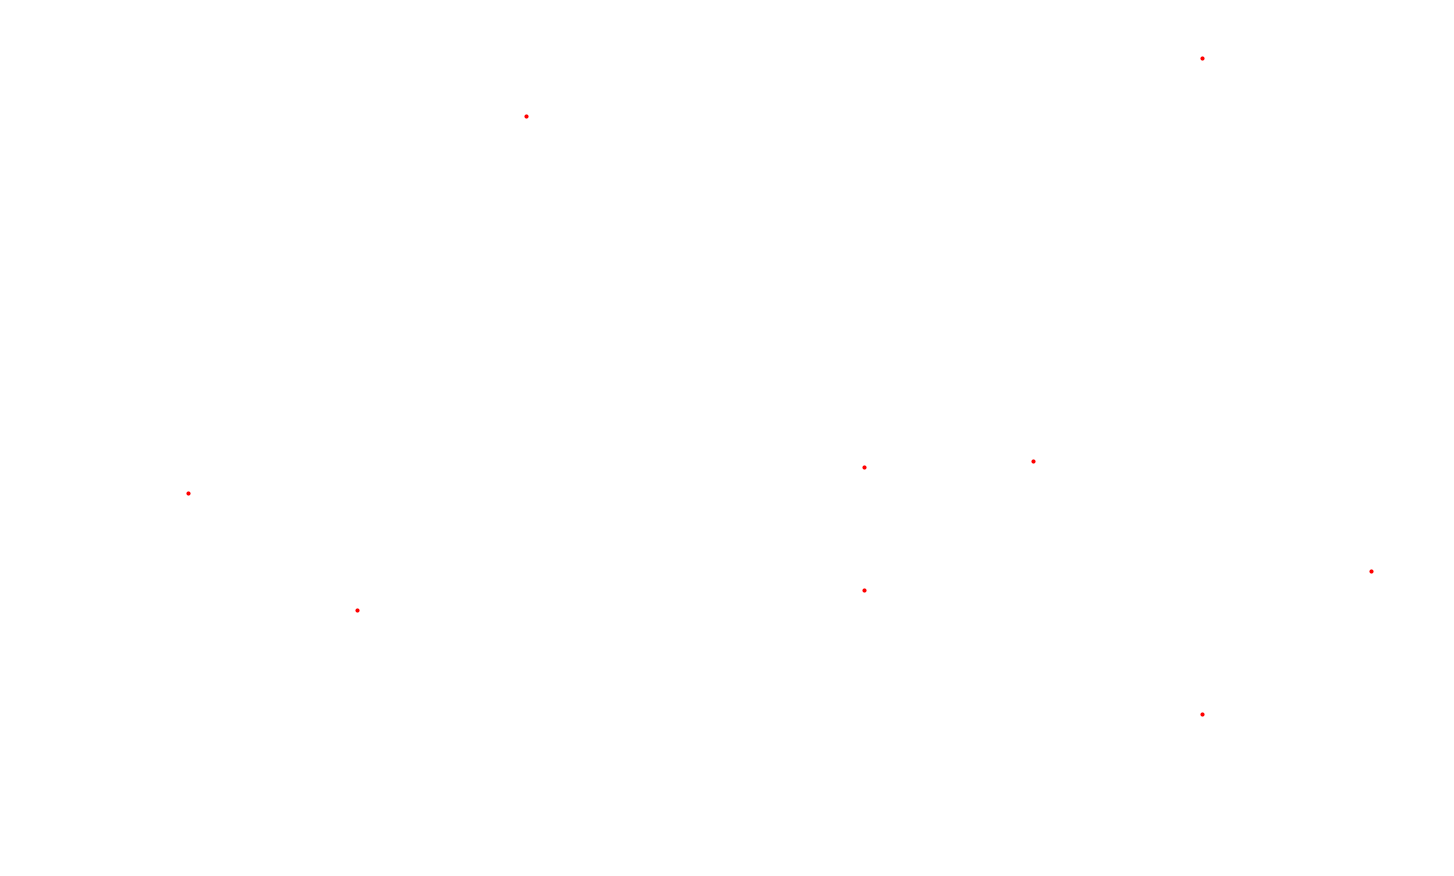

In [13]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Type_dummyElectrical'] = [1 if v == 'Electrical' else 0 for v in Repair['Type_repair']]
lm_Repair2 = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'Type_dummyElectrical', 'intercept']]).fit()
residuals2 = Repair['Repair_time'] - lm_Repair2.predict(Repair[ ['Months_Last','Type_dummyElectrical','intercept'] ])
sns.scatterplot(x=Repair['Months_Last'],y=residuals2,color='red')
plt.show()

### 2.3.8 Testing the Hypotheses of No Relationship Between Repair Time and the Independent Variables
Before testing the hypotheses of no relationship between repair time and the independent
variables in this model, check the conditions necessary for valid inference in regression. If valid,
what are the interpretations of the estimated regression parameters? What does the coefficient
of determination tell you about this model?

### Explanation
Because we are working with only 10 observations, assessing the conditions necessary for
inference to be valid in regression is extremely difficult. However, these scatter charts do not
provide strong evidence of a violation of the conditions. We also note that the parameter
estimate and associated p-value corresponding to months since the last service do not change
substantially when the dummy variable for the type of repair is introduced into the model. This
suggests that multicollinearity is not an issue for this regression model. We will therefore
proceed with our inferences.
The p-value associated with the estimated regression parameter b1 is 0.0004. Because this pvalue is less than the 0.05 level of significance, we reject the hypothesis that beta1 = 0. We
conclude that there is a relationship between the number of months since the last maintenance
service and repair time at the 0.05 level of significance. We estimate that holding the type of
repair constant, a one-month increase in the number of months since the last maintenance
service corresponds with an increase of 0.3876 hours in repair time.
The p-value associated with the estimated regression parameter b2 is 0.0051. Because this pvalue is less than the 0.05 level of significance, we reject the hypothesis that beta2 = 0. We
conclude that there is a relationship between the type of repair and repair time at the 0.05 level
of significance. We estimate that holding the number of months since the last maintenance
service constant, an electrical repair takes 1.2627 hours longer than a mechanical repair.
The y-intercept for this model has been estimated through extrapolation and so does not have a
meaningful interpretation.
The coefficient of determination is R2 = 0.8592, so the regression model explains
approximately 86% of the variation in the values of repair time in the sample.

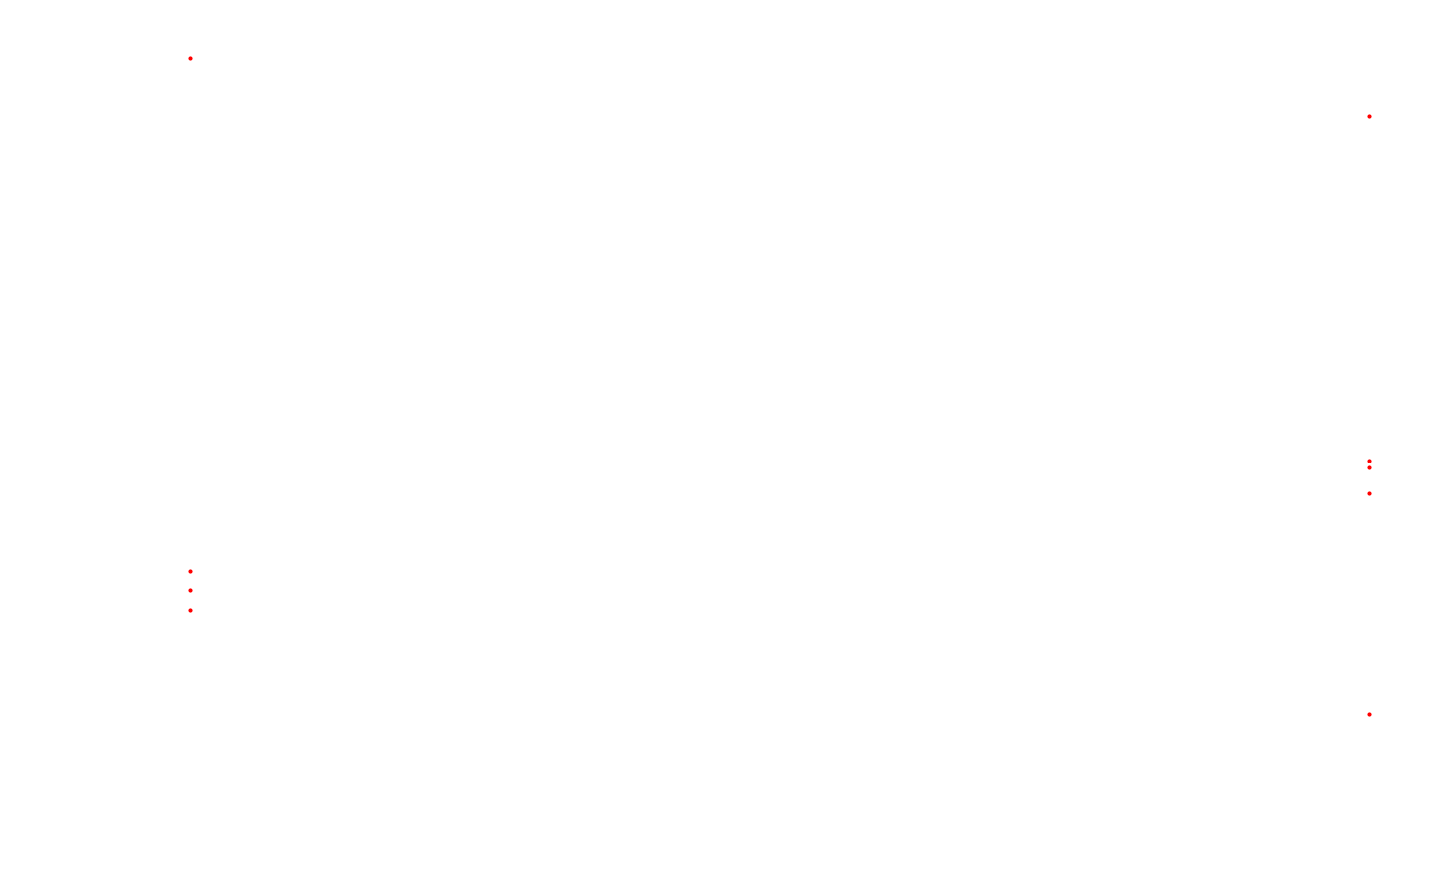

In [14]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Type_dummyElectrical'] = [1 if v == 'Electrical' else 0 for v in Repair['Type_repair']]
lm_Repair2 = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'Type_dummyElectrical', 'intercept']]).fit()
residuals2 = Repair['Repair_time'] - lm_Repair2.predict(Repair[ ['Months_Last','Type_dummyElectrical','intercept'] ])
sns.scatterplot(x=Repair['Type_dummyElectrical'],y=residuals2,color='red')
plt.show()

### 2.3.9 Creating a New Dummy Variable
Create a new dummy variable that is equal to zero if the repair person is Bob Jones and one if
the repair person is Donna Newton. Developed the multiple regression equation to predict
repair time, given the number of months since the last maintenance service and the repair
person people.

In [15]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Person_dummyDonna Newton'] = [1 if v == 'Donna Newton' else 0 for v in Repair['Repairperson']]
lm_Repair3 = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'Person_dummyDonna Newton', 'intercept']]).fit()
print(lm_Repair3.summary())

                            OLS Regression Results                            
Dep. Variable:            Repair_time   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     7.455
Date:                Sun, 11 Jul 2021   Prob (F-statistic):             0.0184
Time:                        07:18:15   Log-Likelihood:                -8.7166
No. Observations:                  10   AIC:                             23.43
Df Residuals:                       7   BIC:                             24.34
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Months_Last             

### Explanation
The estimated multiple linear regression equation is Y' = 3.5263 + 0.1519(Months) -
1.0835(Person).

### 2.3.10 Testing the Hypotheses of No Relationship Between Repair Time and the Independent Variables
Before testing the hypotheses of no relationship between repair time and the independent
variables in this model, check the conditions necessary for valid inference in regression. Create
Python plots of the residuals with each independent variable in this model. If valid, what are the
interpretations of the estimated regression parameters? What does the coefficient of
determination tell you about this model?

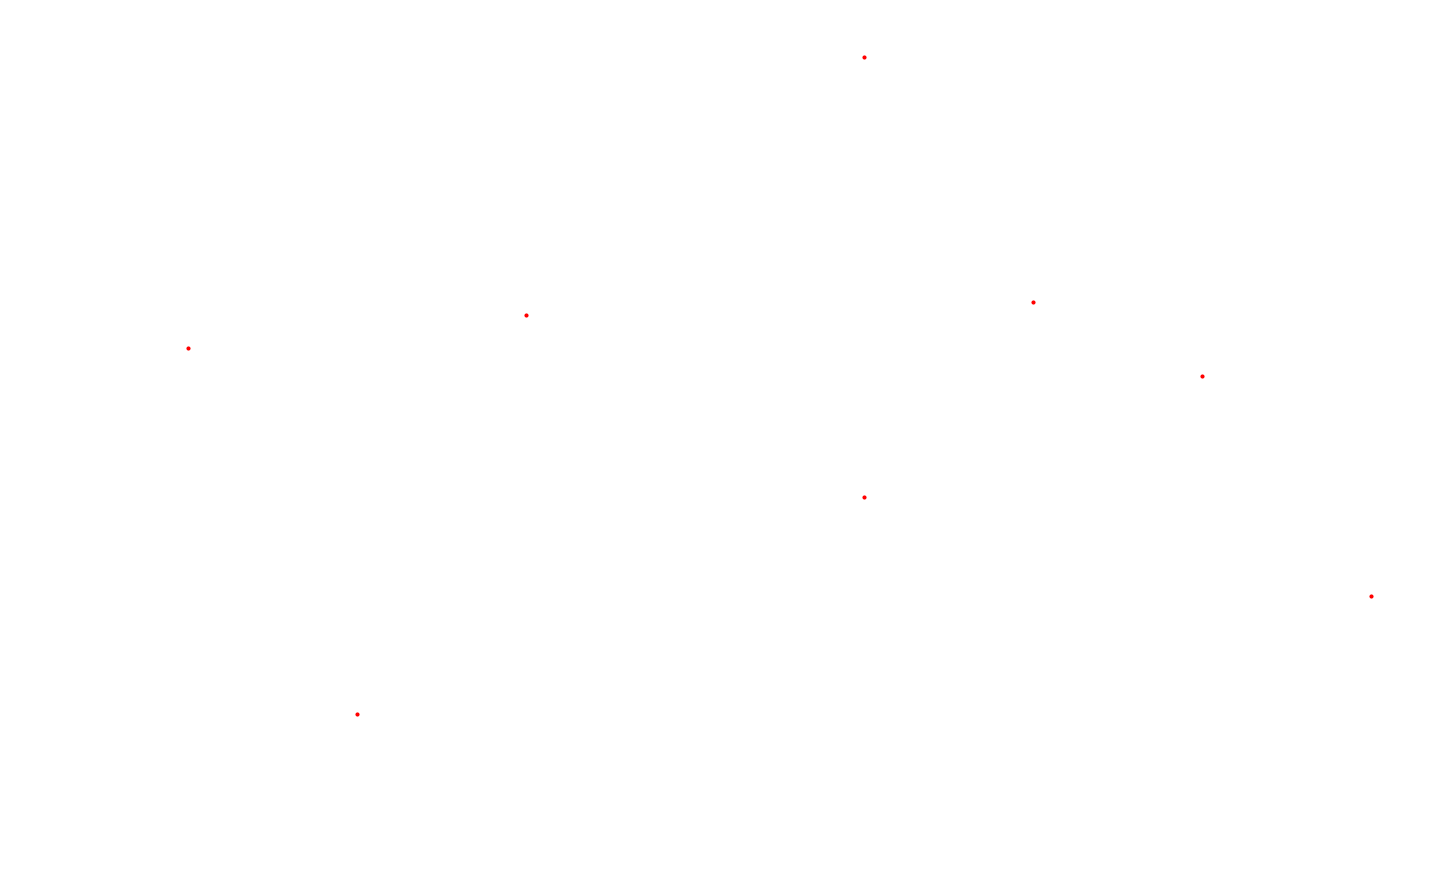

In [16]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Person_dummyDonna Newton'] = [1 if v == "Donna Newton" else 0 for v in Repair['Repairperson']]
lm_Repair3 = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'Person_dummyDonna Newton', 'intercept']]).fit()

residuals3 = Repair['Repair_time'] - lm_Repair3.predict(Repair[['Months_Last', 'Person_dummyDonna Newton', 'intercept']])
sns.scatterplot(x = Repair['Months_Last'], y = residuals3, color = 'red')
plt.show()

### Explanation
Because we are working with only 10 observations, assessing the conditions necessary for
inference to be valid in regression is extremely difficult. However, these scatter charts do not
provide strong evidence of a violation of the conditions. We also note that the parameter
estimate and associated p-value corresponding to months since last service change
substantially when the dummy variable for the repairperson is introduced into the model. This
suggests that multicollinearity is possibly an issue for this regression model. We will keep this
result in mind as we proceed with our inferences.
The estimated regression parameter b1 implies that holding the repairperson constant, a onemonth increase in the number of months since the last maintenance service corresponds to an
increase of 0.1519 hours in repair time. However, the p-value associated with the parameter
estimate is 0.25671, which exceeds the 0.05 level of significance and so leads us to not reject a
test of the hypothesis that beta1 = 0. Based on this multiple linear regression model, we
conclude that holding the repair person constant, there is no relationship between months since
the last maintenance service and repair time. We note, however, that we have evidence that the
independent variables repairperson and months since the last maintenance service are related,
which may explain why months since the last maintenance service is not statistically significant
in this model.
The estimated regression parameter b2 implies that holding the number of months since the
last maintenance service constant, Donna Newton takes 1.0835 hours less than Bob Jones to
make a repair. However, the p-value associated with the parameter estimate is 0.1165, which
exceeds the 0.05 level of significance and so leads us to not reject a test of the hypothesis that
beta2 = 0. Based on this multiple linear regression model, we conclude that holding the months
since the last maintenance service constant, there is no difference in the repair time for Donna
Newton and Bob Jones. Again, we note that we have evidence that the independent variables
repair person and months since the last maintenance service are related, which may explain
why the repairperson dummy variable is not statistically significant in this model.
The y-intercept for this model has been estimated through extrapolation and so does not have a
meaningful interpretation.
The coefficient of determination is R2 = 0.68, so the regression model explains approximately
68% of the variation in the values of repair time in the sample.

### 2.3.11 Testing the Hypotheses of No Relationship Between Repair Time and the Independent Variables
Before testing the hypotheses of no relationship between repair time and the independent
variables in this model, check the conditions necessary for valid inference in regression. Create
Python plots of the residuals with each independent variable in this model. If valid, what are the
interpretations of the estimated regression parameters? What does the coefficient of
determination tell you about this model?

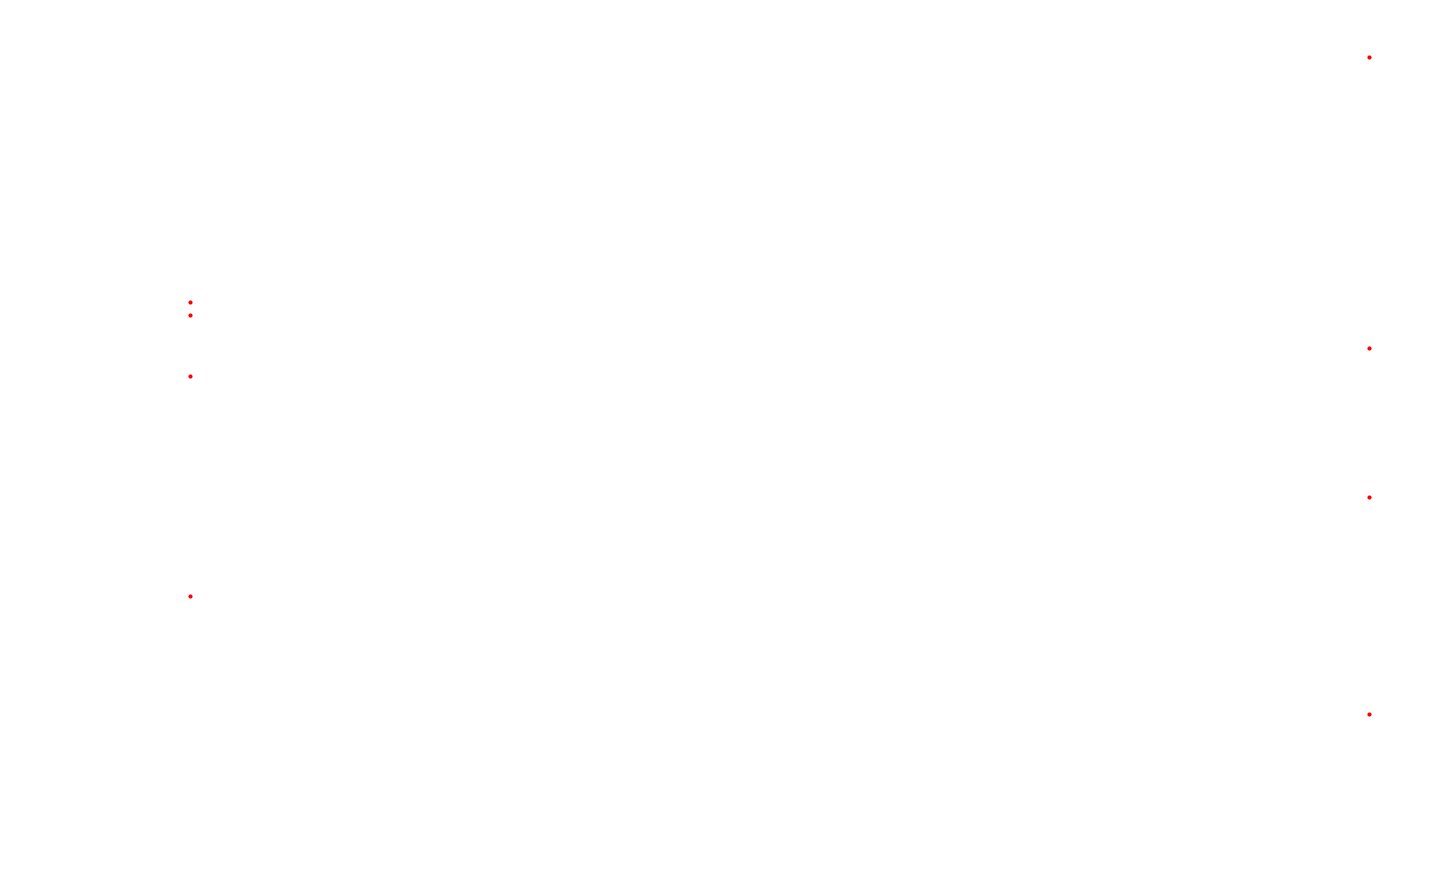

In [17]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Person_dummyDonna Newton'] = [1 if v == "Donna Newton" else 0 for v in Repair['Repairperson']]
lm_Repair3 = sm.OLS(Repair['Repair_time'], Repair[['Months_Last', 'Person_dummyDonna Newton', 'intercept']]).fit()

residuals3 = Repair['Repair_time'] - lm_Repair3.predict(Repair[ ['Months_Last','Person_dummyDonna Newton','intercept'] ])
sns.scatterplot(x=Repair['Person_dummyDonna Newton'],y=residuals3,color='red')
plt.show()

### 2.3.12 Developing the Multiple Regression Equation
Develop the multiple regression equation to predict repair time, given the number of months
since the last maintenance service, the type of repair, and the repair person.

In [18]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Type_dummyElectrical'] = [1 if v == 'Electrical' else 0 for v in Repair['Type_repair']]
Repair['Person_dummyDonna Newton'] = [1 if v == 'Donna Newton' else 0 for v in Repair['Repairperson'] ]
lm_Repair4 = sm.OLS(Repair['Repair_time'],Repair[ ['Months_Last','Type_dummyElectrical','Person_dummyDonna Newton','intercept'] ]).fit()
print(lm_Repair4.summary())

                            OLS Regression Results                            
Dep. Variable:            Repair_time   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     18.04
Date:                Sun, 11 Jul 2021   Prob (F-statistic):            0.00209
Time:                        07:18:15   Log-Likelihood:                -2.8990
No. Observations:                  10   AIC:                             13.80
Df Residuals:                       6   BIC:                             15.01
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Months_Last             

### 2.3.13 Testing the Hypotheses of No Relationship Between Repair Time and the Independent Variables
Before testing the hypotheses of no relationship between repair time and the number of months
since the last maintenance service, check the conditions necessary for valid inference in
regression. Create plots of the residuals with each independent variable. If valid, what are the
interpretations of the estimated regression parameters? What does the coefficient of
determination tell you about this model?

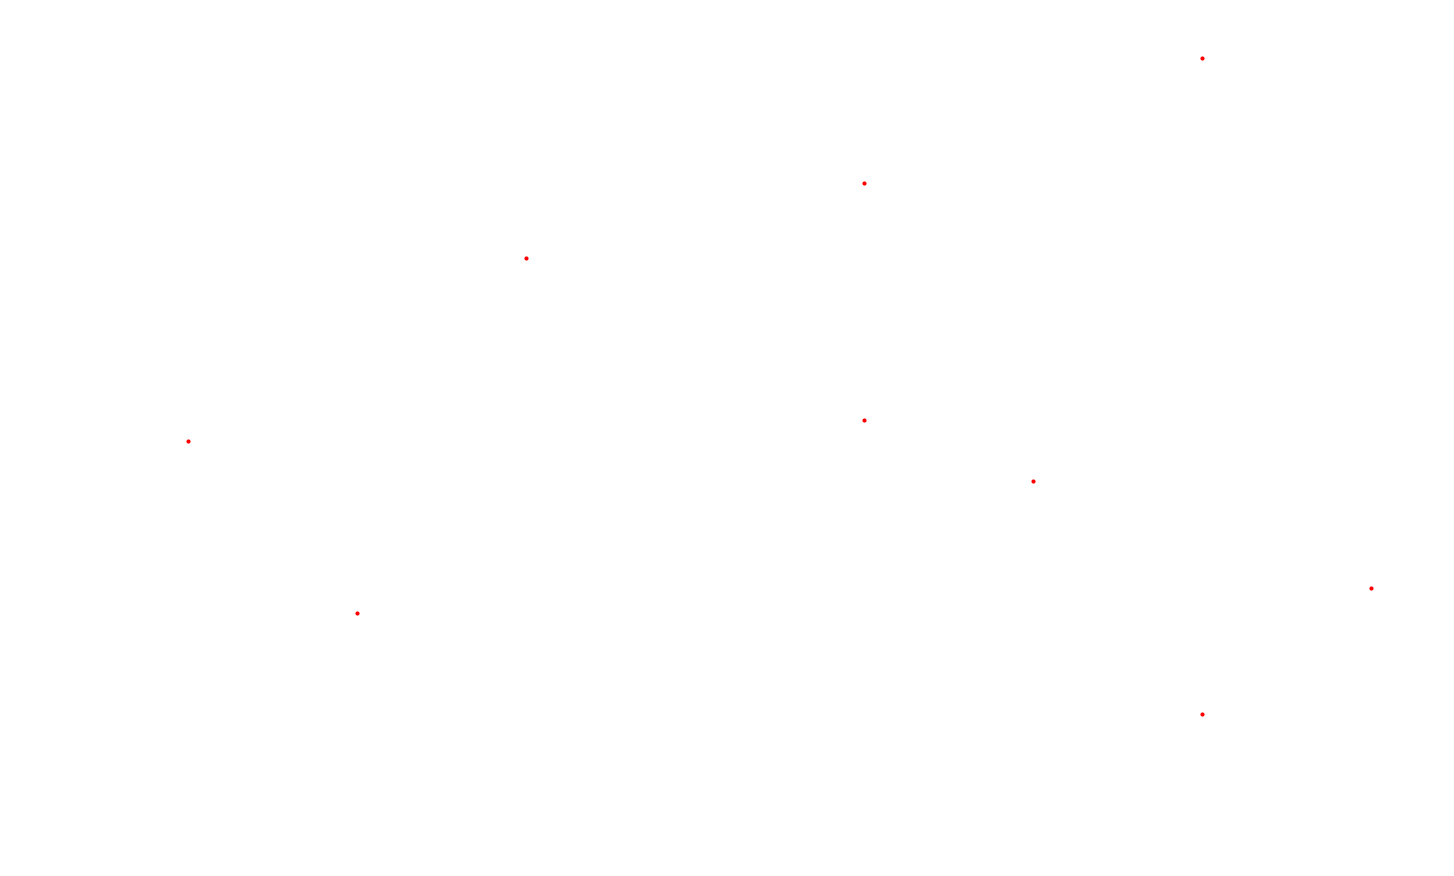

In [19]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Type_dummyElectrical'] = [1 if v == 'Electrical' else 0 for v in Repair['Type_repair']]
Repair['Person_dummyDonna Newton'] = [1 if v == 'Donna Newton' else 0 for v in Repair['Repairperson'] ]
lm_Repair4 = sm.OLS(Repair['Repair_time'],Repair[ ['Months_Last','Type_dummyElectrical','Person_dummyDonna Newton','intercept'] ]).fit()

residuals4 = Repair['Repair_time'] - lm_Repair4.predict(Repair[['Months_Last','Type_dummyElectrical','Person_dummyDonna Newton','intercept']])
sns.scatterplot(x=Repair['Months_Last'],y=residuals4,color='red')
plt.show()

### Explanation
Because we are working with only 10 observations, assessing the conditions necessary for
inference to be valid in regression is extremely difficult. However, these scatter charts do not
provide strong evidence of a violation of the conditions.
To check for the potential introduction of multicollinearity that may occur when we add the
dummy variables to the model, we compare the parameter estimates and p-values from the
model that includes only the number of months since the last maintenance service and the type
of repair dummy variable (from 2.06) with those from the model that includes all three
independent variables (from 2.06). When making these comparisons we observe that the
parameter estimates and p-values associated with the number of months since the last
maintenance service and the type of repair dummy variable do not change substantially when
the dummy variable for repairperson is introduced into or removed from the model.
We also compare the parameter estimates and p-values from the model that includes only the
number of months since the last maintenance service and the repairperson dummy variable
(from 2.08) with those from the model that includes all three independent variables (from 2.10).
When making these comparisons we observe that (i) the parameter estimates and p-values
associated with the number of months since the last maintenance service change substantially
and (ii) the parameter estimates and p-values associated with the repairperson dummy variable
do not change substantially when the dummy variable for the type of repair is introduced into or
removed from the model. These results suggest that multicollinearity between the number of
months since the last maintenance service and the repairperson dummy variable may be an
issue for this regression model. We will keep this in mind as we proceed with our inferences.
The p-value associated with the estimated regression parameter b1 is 0.0130. Because this pvalue is less than the 0.05 level of significance, we reject the hypothesis that beta1 = 0. We
conclude that there is a relationship between the number of months since the last maintenance
service and repair time at the 0.05 level of significance. We estimate that holding the type of
repair and repairperson constant, a one-month increase in the number of months since the last
maintenance service corresponds to an increase of 0.2914 hours in repair time.
The p-value associated with the estimated regression parameter b2 is 0.0109. Because this pvalue is less than the 0.05 level of significance, we reject the hypothesis that beta2 = 0. We
conclude that there is a relationship between the type of repair and repair time at the 0.05 level
of significance. We estimate that holding the number of months since the last maintenance
service and the repairperson (Donna Newton or Bob Jones) constant, an electrical repair takes
1.1024 hours longer than a mechanical repair.
Furthermore, the estimated regression parameter b3 implies that holding the number of months
since the last maintenance service and the type of repair (mechanical or electrical) constant,
Donna Newton takes 0.6091 hours less than Bob Jones to make a repair. However, the p-value
associated with the parameter estimate is 0.1674, which exceeds the 0.05 level of significance
and so leads us to not reject a test of the hypothesis that beta3 = 0. Based on this multiple
linear regression model, we conclude that there is no difference in repair times for Bob Jones
and Donna Newton.
Finally, the y-intercept for this model has been estimated through extrapolation and so does not
have a meaningful interpretation.
The coefficient of determination R2 = 0.9002, so the regression model explains approximately
90% of the variation in the values of repair time in the sample.

### 2.3.14 Testing the Hypotheses of No Relationship Between Repair Time and the Independent Variables
Before testing the hypotheses of no relationship between repair time and the number of months
since the last maintenance service, check the conditions necessary for valid inference in
regression. Create plots of the residuals with each independent variable. If valid, what are the
interpretations of the estimated regression parameters? What does the coefficient of
determination tell you about this model?

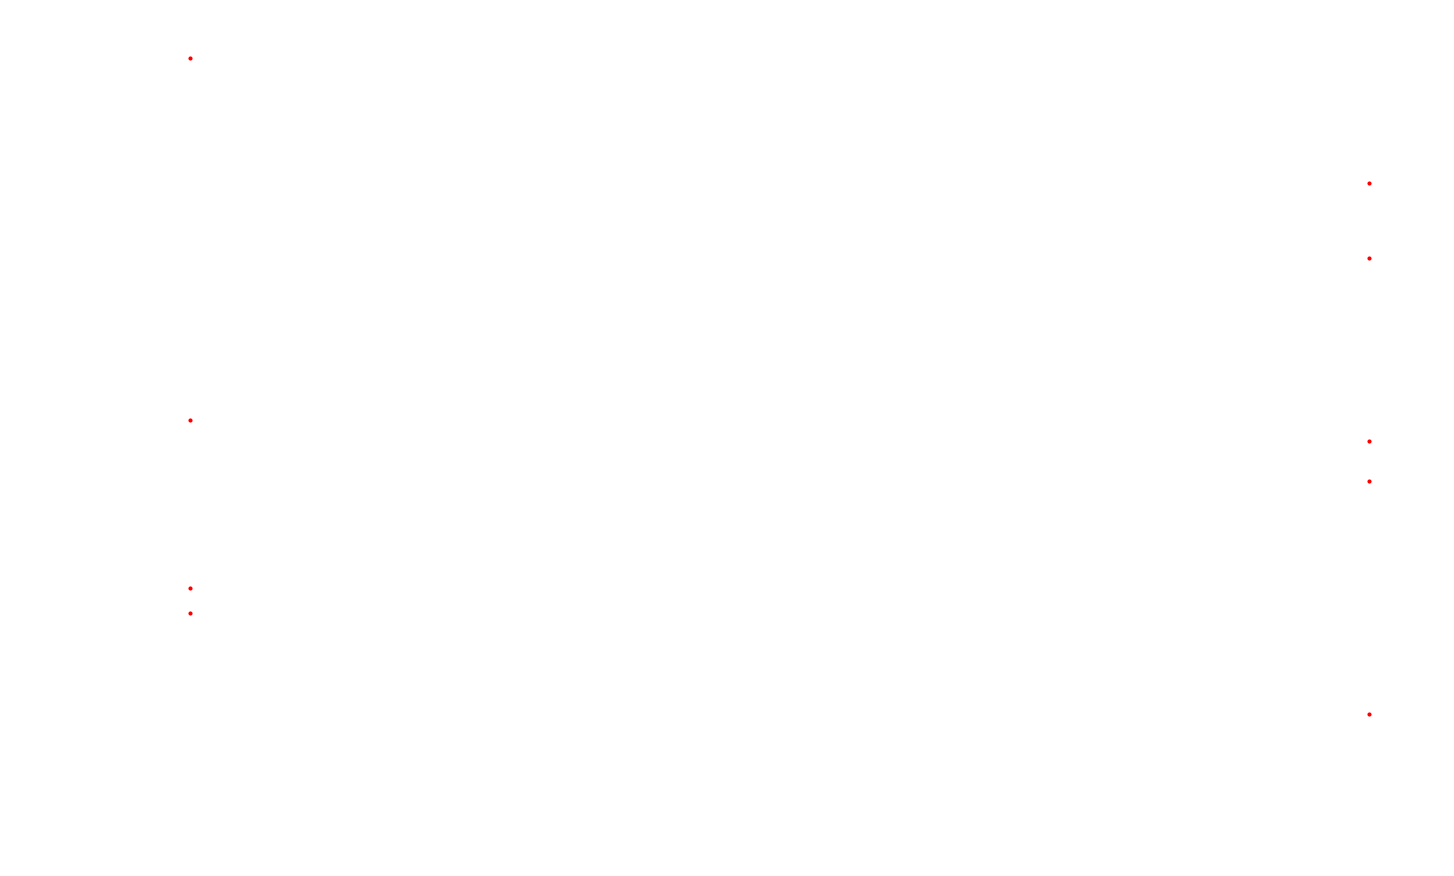

In [20]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Type_dummyElectrical'] = [1 if v == 'Electrical' else 0 for v in Repair['Type_repair']]
Repair['Person_dummyDonna Newton'] = [1 if v == 'Donna Newton' else 0 for v in Repair['Repairperson'] ]
lm_Repair4 = sm.OLS(Repair['Repair_time'],Repair[ ['Months_Last','Type_dummyElectrical','Person_dummyDonna Newton','intercept'] ]).fit()

residuals4 = Repair['Repair_time'] - lm_Repair4.predict(Repair[['Months_Last','Type_dummyElectrical','Person_dummyDonna Newton','intercept']])
sns.scatterplot(x=Repair['Type_dummyElectrical'],y=residuals4,color='red')
plt.show()

### 2.3.15 Testing the Hypotheses of No Relationship Between Repair Time and the Independent Variables
Before testing the hypotheses of no relationship between repair time and the number of months
since the last maintenance service, check the conditions necessary for valid inference in
regression. Create plots of the residuals with each independent variable. If valid, what are the
interpretations of the estimated regression parameters? What does the coefficient of
determination tell you about this model? Which of these models would you use? Why?

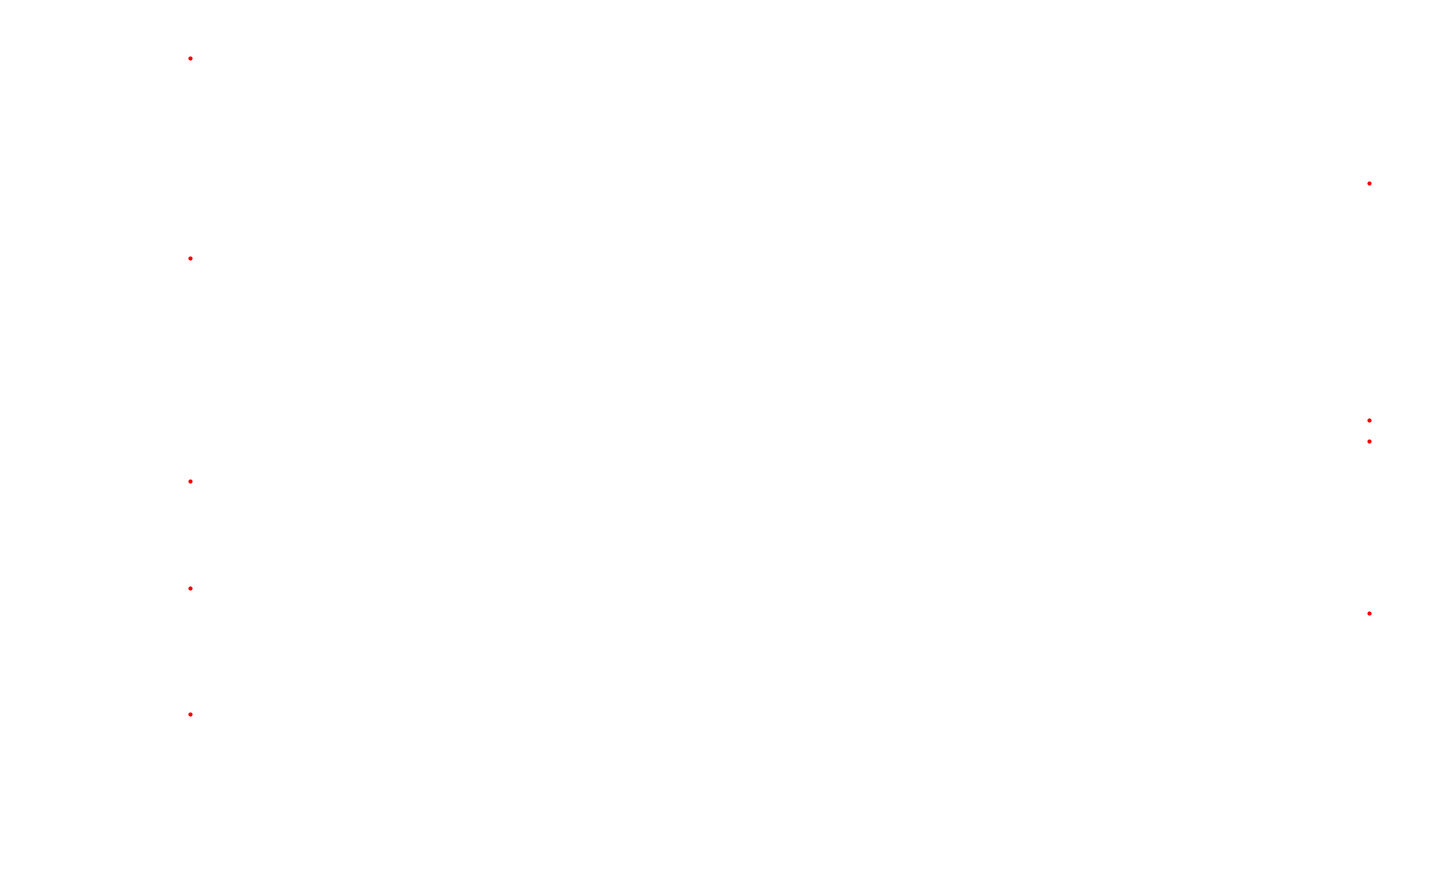

In [21]:
Repair = pd.read_csv('data/Repair.csv')
Repair['intercept'] = 1
Repair['Type_dummyElectrical'] = [1 if v == 'Electrical' else 0 for v in Repair['Type_repair']]
Repair['Person_dummyDonna Newton'] = [1 if v == 'Donna Newton' else 0 for v in Repair['Repairperson'] ]
lm_Repair4 = sm.OLS(Repair['Repair_time'],Repair[ ['Months_Last','Type_dummyElectrical','Person_dummyDonna Newton','intercept'] ]).fit()

residuals4 = Repair['Repair_time'] - lm_Repair4.predict(Repair[['Months_Last','Type_dummyElectrical','Person_dummyDonna Newton','intercept']])
sns.scatterplot(x=Repair['Person_dummyDonna Newton'],y=residuals4,color='red')
plt.show()

### Scenario 3
Over the past few years, the percentage of students who leave Dana College at the end of their first year has increased. Last year, Dana started voluntary one-credit hour-long seminars with faculty to help first-year students establish an on-campus connection. If Dana is able to show that the seminars have a positive effect on retention, college administrators will be convinced to continue funding this initiative. Dana's administration also suspects that first-year students with lower high school GPA's have a higher probability of leaving Dana at the end of the first year. Data on the 500 first-year students from last year has been collected. Each observation consists of a first-year student's high school GPA, whether they enrolled in a seminar, and whether they dropped out and did not return to Dana. Apply logistic regression to classify observations as dropped out or not dropped out by using GPA and Seminar as input variables and Dropped as the target (or response) variable.

### 3.5.1 Creating a ROC Curve Question 20 : 
Because the data is relatively imbalanced (83 Coupon = Yes and 417 Coupon = No observations in the training set), you will use AUC of the ROC curve to evaluate our classification models. Create a ROC curve using the your predictions on the validation dataset to determine your model's accuracy. (Hint: one way to construct ROC curves is by using the sklearn library and roc_curve)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


Optimization terminated successfully.
         Current function value: 296.096584
         Iterations 6


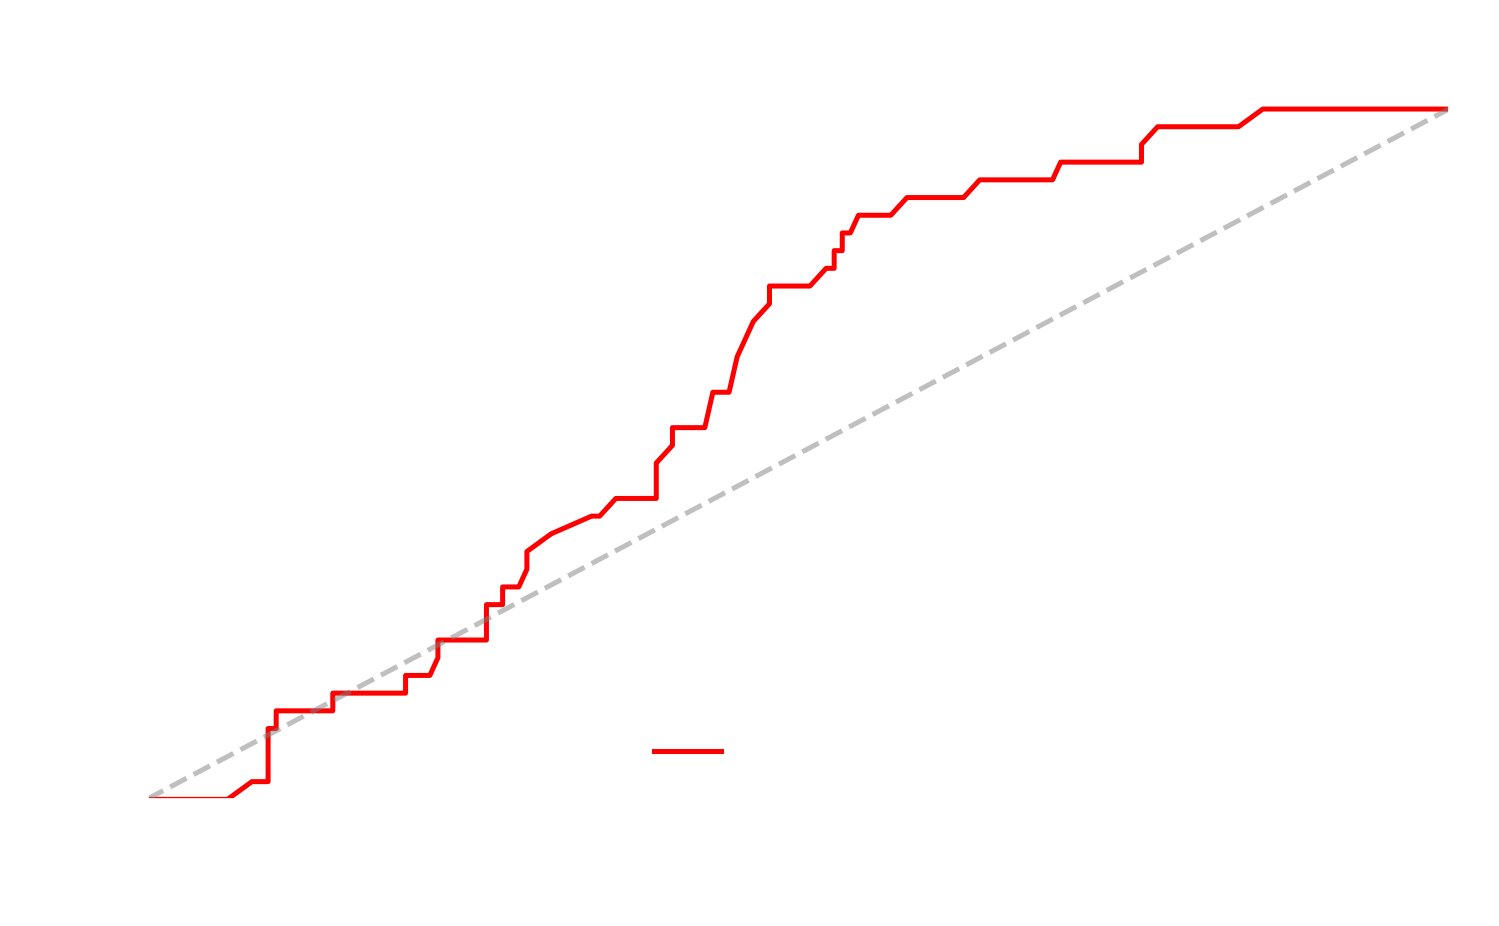

In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

DanaTrain = pd.read_csv('data/DanaTrain.csv')
DanaValidation = pd.read_csv('data/DanaValidation.csv')
DanaTrain['intercept'] = 1
DanaTrain = pd.get_dummies(DanaTrain,drop_first=True)
mymodel2 = sm.Logit(DanaTrain[ ['Dropped_Yes'] ],DanaTrain[ ['GPA','intercept'] ]).fit()
DanaValidation['intercept'] = 1
DanaValidation = pd.get_dummies(DanaValidation,drop_first=True)

logit_roc_auc = roc_auc_score(DanaValidation['Dropped_Yes'], mymodel2.predict(DanaValidation[ ['GPA','intercept'] ]))
fpr, tpr, thresholds = roc_curve(DanaValidation['Dropped_Yes'], mymodel2.predict(DanaValidation[ ['GPA','intercept'] ]))
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(logit_roc_auc),color='red')
plt.plot([0, 1], [0, 1],color='grey',alpha=.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logit DanaValidation Dropped_Yes')
plt.legend(loc='lower center')
plt.show()

### Explanation 
Because both models perform equally well, we will use the one-variable model. The absence of the Seminar variable in the best-performing logistic regression suggests that there is not strong evidence that the first-year seminars improve retention.

### 3.5.2 Removing the Least Significant Independent Variable & Rerunning the Logistic Model
Remove the least significant independent variable (Seminar) and rerun the Logistic model.

In [23]:
DanaTrain = pd.read_csv('data/DanaTrain.csv')
DanaTrain['intercept'] = 1
DanaTrain = pd.get_dummies(DanaTrain, drop_first=True)

mymodel2 = sm.Logit(DanaTrain[['Dropped_Yes']], DanaTrain[['GPA', 'intercept']]).fit()
print(mymodel2.summary())

Optimization terminated successfully.
         Current function value: 296.096584
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Dropped_Yes   No. Observations:                  300
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            1
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                     inf
Time:                        07:18:16   Log-Likelihood:                -88829.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GPA           -0.6337      0.351     -1.804      0.071      -1.322       0.055
intercept      0.3762      

C:\Users\vreed\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\vreed\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\vreed\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


### Explanation
The resulting reduced model is: Log odds of dropping out = 0.3762 ' 0.6337GPA.

### 3.5.3 Using Descriptive Statistics and Charts
The data analyst team realized that they jumped directly into building a predictive model without exploring the data. Using descriptive statistics and charts, investigate any relationships in the data that may explain the unsatisfactory result in your previous work. In particular, construct a scatterplot and boxplot on the training data variables of 
GPA and Seminar. For next year's first-year class, what would Dana's administration do regarding the enrollment of the seminars to better determine whether they have an effect on retention?


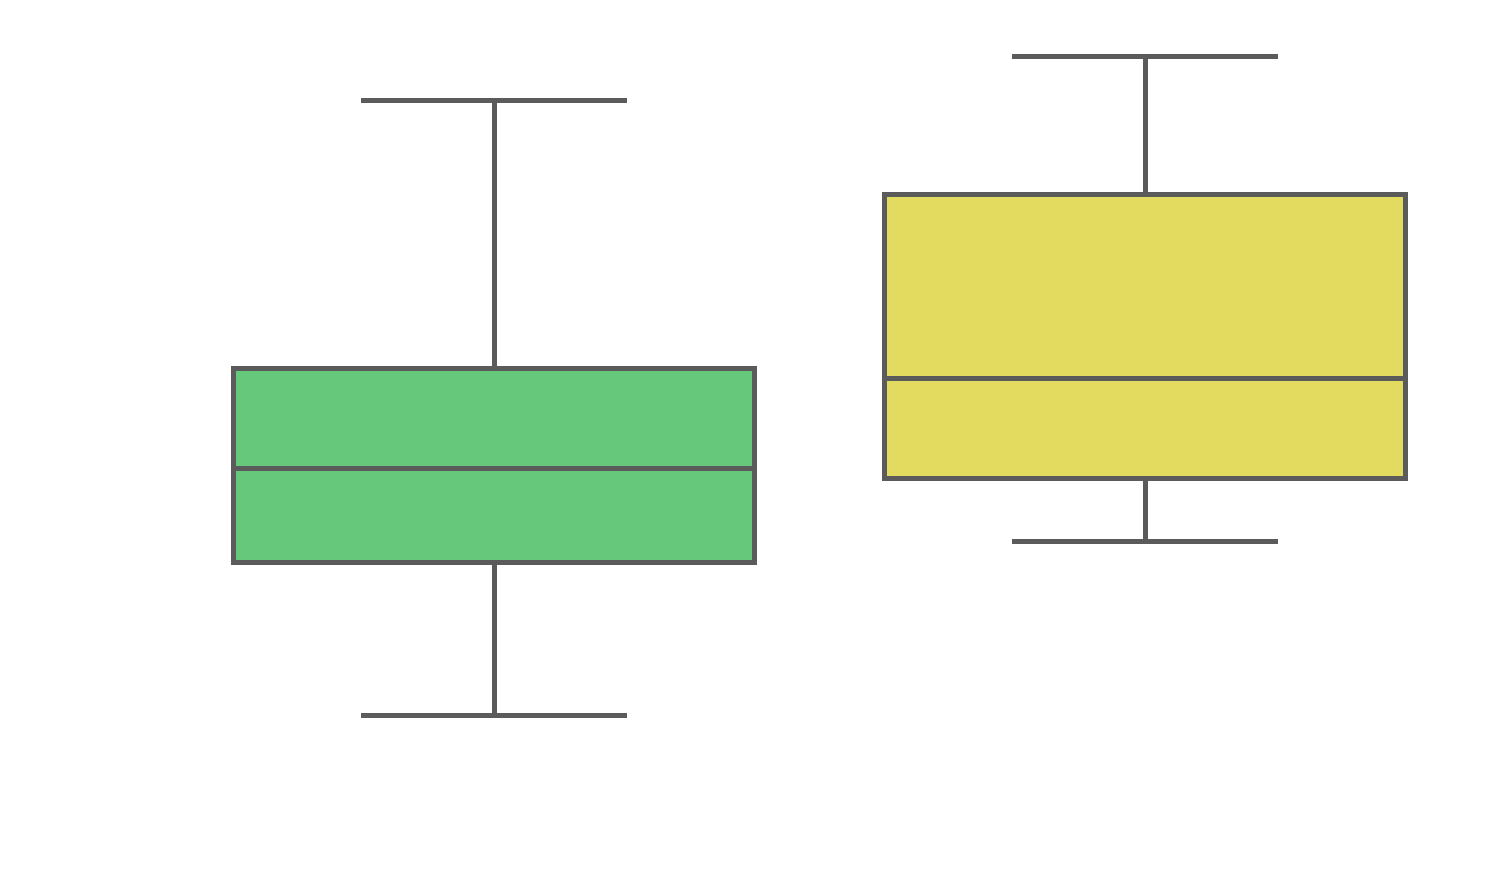

In [24]:
DanaTrain = pd.read_csv('data/DanaTrain.csv')
DanaTrain['intercept'] = 1
DanaTrain = pd.get_dummies(DanaTrain, drop_first=True)

sns.boxplot(x = DanaTrain['Seminar'], y = DanaTrain['GPA'])
plt.show()

### Explanation
The students signing up for seminars on average have higher high school GPAs than the students who are not (see scatter plot and box plot below). Because high school GPA is positively related to staying in school (not dropping out), it is difficult to ascertain whether seminars are having any impact on drop-outs. That is, students already less likely to drop out are the ones enrolling in the seminars. To produce data that will allow Dana to better evaluate whether seminars indeed reduce the chance of students dropping out, the administration should encourage at-risk students (low high school GPAs and other factors) to enroll in the seminars (perhaps giving these at-risk students first priority to enroll in the seminars).

### 3.5.4 Scatterplot of 3.5.3

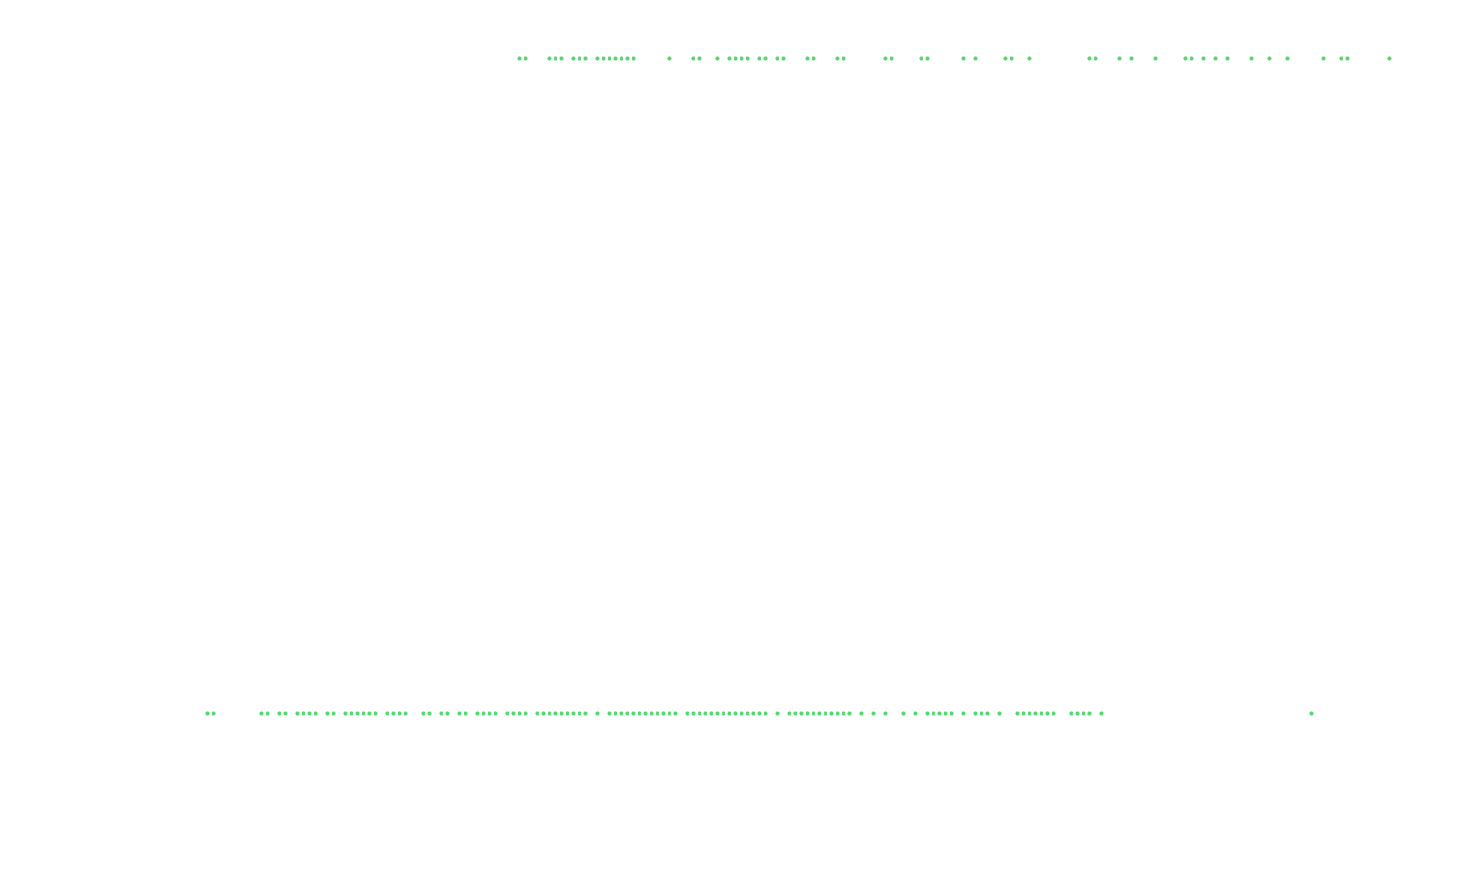

In [25]:
sns.scatterplot(x = DanaTrain['GPA'], y = DanaTrain['Seminar'])
plt.show()

### Explanation
The students signing up for seminars on average have higher high school GPAs than the students who are not (see scatter plot and box plot below). Because high school GPA is positively related to staying in school (not dropping out), it is difficult to ascertain whether seminars are having any impact on drop-outs. That is, students already less likely to drop out are the ones enrolling in the seminars. To produce data that will allow Dana to better evaluate whether seminars indeed reduce the chance of students dropping out, the administration should encourage at-risk students (low high school GPAs and other factors) to enroll in the seminars (perhaps giving these at-risk students first priority to enroll in the seminars).

### 3.5.5 Creating a ROC Curve 
Because the data is relatively imbalanced (83 Coupon = Yes and 417 Coupon = No observations in the training set), you will use AUC of the ROC curve to evaluate your classification models. Create a ROC curve using your predictions on the validation dataset to determine your model's accuracy.

Optimization terminated successfully.
         Current function value: 296.100447
         Iterations 6


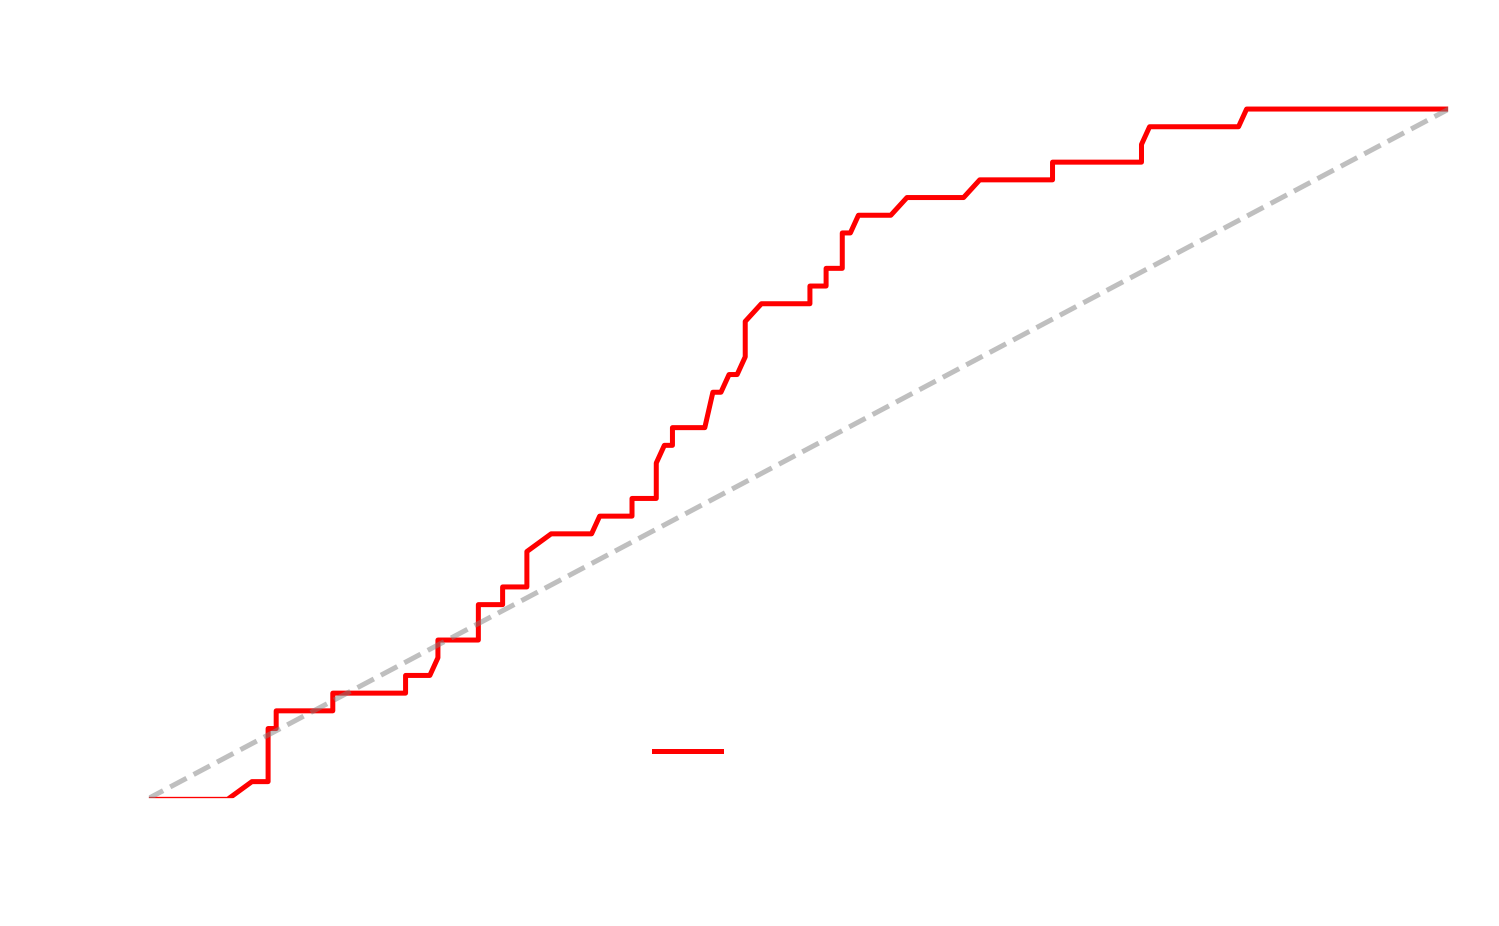

In [26]:
DanaTrain = pd.read_csv('data/DanaTrain.csv')
DanaValidation = pd.read_csv('data/DanaValidation.csv')
DanaTrain['intercept'] = 1
DanaTrain = pd.get_dummies(DanaTrain,drop_first=True)
mymodel = sm.Logit(DanaTrain[ ['Dropped_Yes'] ],DanaTrain[ ['GPA', 'Seminar', 'intercept'] ]).fit()
DanaValidation['intercept'] = 1
DanaValidation = pd.get_dummies(DanaValidation,drop_first=True)

logit_roc_auc = roc_auc_score(DanaValidation['Dropped_Yes'], mymodel.predict(DanaValidation[['GPA', 'Seminar', 'intercept']]))
fpr, tpr, thresholds = roc_curve(DanaValidation['Dropped_Yes'], mymodel.predict(DanaValidation[['GPA', 'Seminar', 'intercept']]))
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(logit_roc_auc),color='red')
plt.plot([0, 1], [0, 1],color='grey',alpha=.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logit DanaValidation Dropped_Yes')
plt.legend(loc='lower center')
plt.show()

### 3.5.6 Evaluating the Candidate Logistic Regression Models
Evaluate the candidate logistic regression models based on their predictive performance on the validation set. Recommend a final model and express the model as a mathematical equation relating the target variable to the input variables. What is the implication on the effectiveness of the first-year seminars on retention?

In [27]:
DanaTrain = pd.read_csv('data/DanaTrain.csv')
DanaTrain['intercept'] = 1
DanaTrain = pd.get_dummies(DanaTrain,drop_first=True)

mymodel = sm.Logit(DanaTrain[['Dropped_Yes']], DanaTrain[['GPA', 'Seminar', 'intercept']]).fit()
print(mymodel.summary())

Optimization terminated successfully.
         Current function value: 296.100447
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Dropped_Yes   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                     inf
Time:                        07:18:17   Log-Likelihood:                -88830.
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
GPA           -0.6307      0.375     -1.683      0.092      -1.365       0.104
Seminar       -0.0088      

C:\Users\vreed\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\vreed\anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\vreed\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3409: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.llf/self.llnull


### 4.4.1 Using a Cutoff Value to Classify a Movie as a Winner or Not 
Note that each year there is only one winner of the Best Picture Oscar. Knowing this, what is wrong with classifying a movie based on a cut off value? (Hint: investigate the predicted results on an annual basis using the validation data.)

In [28]:
import statsmodels.api as sm

oscars_all = pd.read_excel('data/Oscars.xlsx').set_index(['Year', 'Title'])
oscars_train = oscars_all.loc[oscars_all['Partition'] == 't'].drop(columns='Partition')
oscars_test = oscars_all.loc[oscars_all['Partition'] == 'v'].drop(columns='Partition')
oscars_train['intercept'] = 1
oscars_test['intercept'] = 1
oscars_train.drop(columns='Comedy', inplace=True, errors='ignore')
oscars_test.drop(columns='Comedy', inplace=True, errors='ignore')
mymodel2 = sm.Logit(oscars_train['Winner'], oscars_train[[c for c in oscars_train if c != 'Winner']]).fit()

Optimization terminated successfully.
         Current function value: 0.315266
         Iterations 7


In [29]:
oscars_test['LogitPredictions'] = round(mymodel2.predict(oscars_test[['OscarNominations', 'GoldenGlobeWins', 'intercept']]))
print(oscars_test.head(15))

                                          OscarNominations  GoldenGlobeWins  \
Year Title                                                                    
2008 The Curious Case of Benjamin Button                13                0   
     Frost / Nixon                                       5                0   
     Milk                                                8                0   
     The Reader                                          5                1   
     Slumdog Millionaire                                10                4   
2009 The Hurt Locker                                     9                0   
     Avatar                                              9                2   
     The Blind Side                                      2                1   
     District 9                                          4                0   
     An Education                                        3                0   
     Inglourious Bastards                           

### 4.4.2 Evaluating a Logistic Model 
Evaluate a logistic model to predict whether or not a picture will win an Oscar using all available inputs in the oscars_train dataset.

In [30]:
oscars_all = pd.read_excel('data/Oscars.xlsx').set_index(['Year', 'Title'])
oscars_train = oscars_all.loc[oscars_all['Partition'] == 't'].drop(columns='Partition')
oscars_test = oscars_all.loc[oscars_all['Partition'] == 'v'].drop(columns='Partition')
oscars_train['intercept'] = 1
oscars_test['intercept'] = 1

mymodel = sm.Logit(oscars_train['Winner'], oscars_train[[c for c in oscars_train if c != 'Winner']]).fit()
print(mymodel.summary())

         Current function value: 0.296240
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 Winner   No. Observations:                  120
Model:                          Logit   Df Residuals:                      116
Method:                           MLE   Df Model:                            3
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                  0.4080
Time:                        07:18:17   Log-Likelihood:                -35.549
converged:                      False   LL-Null:                       -60.048
Covariance Type:            nonrobust   LLR p-value:                 1.305e-10
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
OscarNominations     0.3894      0.137      2.852      0.004       0.122       0.657
GoldenGlobeWins      0.9049      0.266      3.4

C:\Users\vreed\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Explanation
The output of the Logistic model using all inputs is as follows: Log odds of winning best picture
= -5.9836 + 0.3894OscarNominations + 0.9049GoldenGLobeWins - 23.3367Comedy.

### 4.4.3 Creating a ROC Curve 
Create a ROC Curve and evaluate the area under the curve using your predictions on the validation dataset.

Optimization terminated successfully.
         Current function value: 0.315266
         Iterations 7


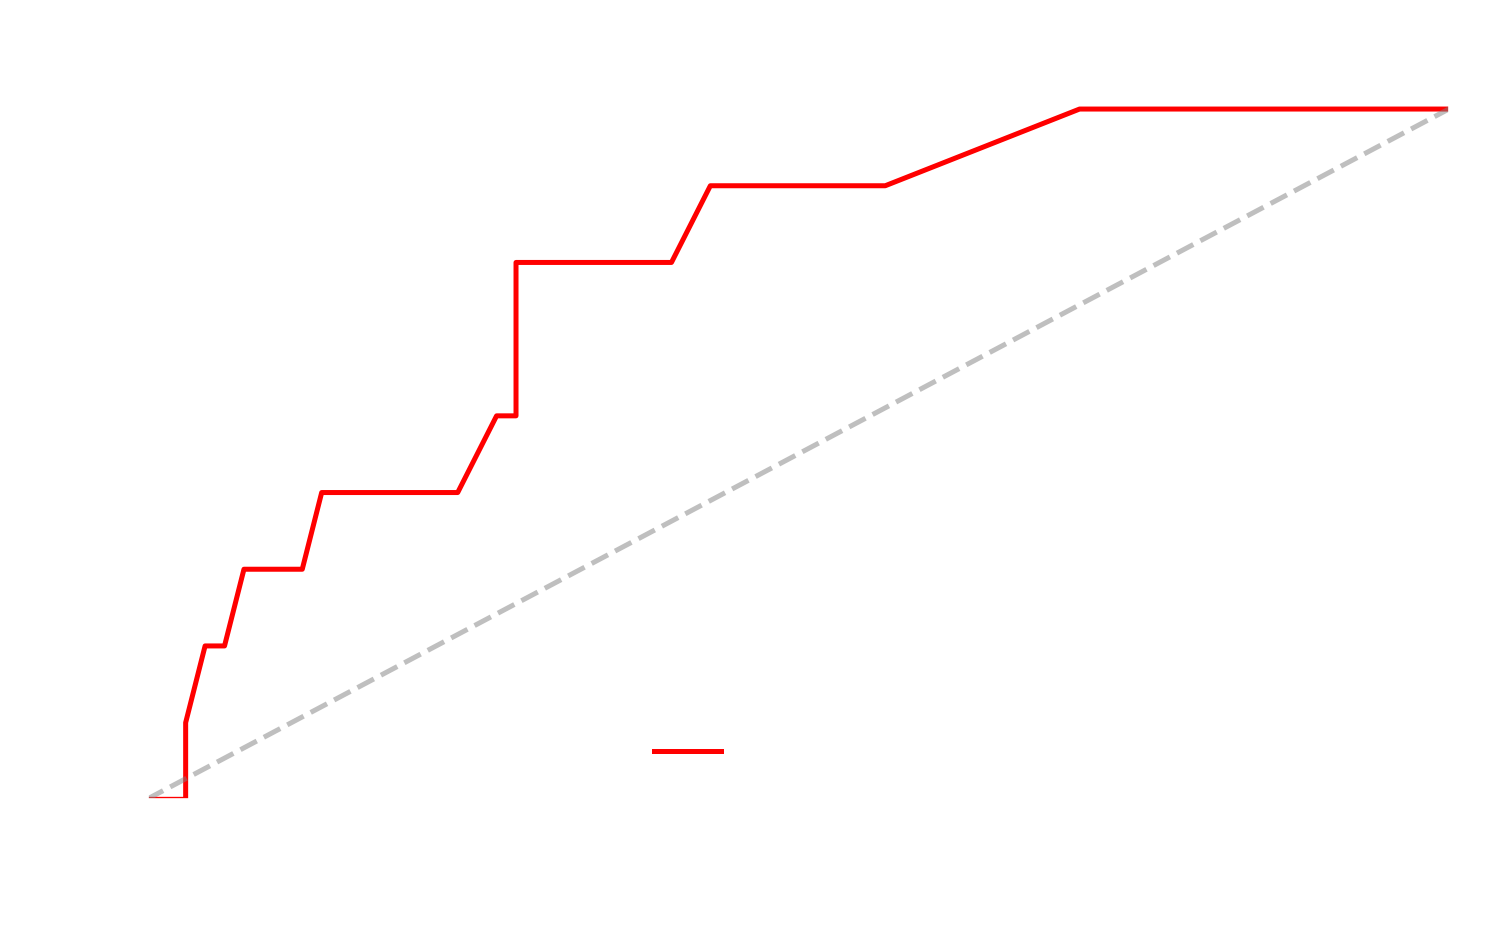

In [31]:
oscars_all = pd.read_excel('data/Oscars.xlsx').set_index(['Year', 'Title'])
oscars_train = oscars_all.loc[oscars_all['Partition'] == 't'].drop(columns='Partition')
oscars_test = oscars_all.loc[oscars_all['Partition'] == 'v'].drop(columns='Partition')
oscars_train['intercept'] = 1
oscars_test['intercept'] = 1
oscars_train.drop(columns='Comedy', inplace=True, errors='ignore')
oscars_test.drop(columns='Comedy', inplace=True, errors='ignore')
mymodel2 = sm.Logit(oscars_train['Winner'], oscars_train[[c for c in oscars_train if c != 'Winner']]).fit()

logit_roc_auc = roc_auc_score(oscars_test['Winner'], mymodel2.predict(oscars_test[ [c for c in oscars_test if c != 'Winner'] ]))
fpr, tpr, thresholds = roc_curve(oscars_test['Winner'], mymodel2.predict(oscars_test[ [c for c in oscars_test if c != 'Winner'] ]))
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(logit_roc_auc),color='red')
plt.plot([0, 1], [0, 1],color='grey',alpha=.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logit DanaValidation Dropped_Yes')
plt.legend(loc='lower center')
plt.show()

### 4.4.4 Performing the Logistic Regression Model on the Reduced Model 
Remove the Comedy variable since it is the least significant of the variables in the full model, and perform the logistic regression model on the reduced model.

In [32]:
oscars_all = pd.read_excel('data/Oscars.xlsx').set_index(['Year', 'Title'])
oscars_train = oscars_all.loc[oscars_all['Partition'] == 't'].drop(columns='Partition')
oscars_test = oscars_all.loc[oscars_all['Partition'] == 'v'].drop(columns='Partition')
oscars_train['intercept'] = 1
oscars_test['intercept'] = 1

oscars_train.drop(columns='Comedy', inplace=True, errors='ignore')
oscars_test.drop(columns='Comedy', inplace=True, errors='ignore')

mymodel2 = sm .Logit(oscars_train['Winner'], oscars_train[[c for c in oscars_train if c != 'Winner']]).fit()
print(mymodel2.summary())

Optimization terminated successfully.
         Current function value: 0.315266
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Winner   No. Observations:                  120
Model:                          Logit   Df Residuals:                      117
Method:                           MLE   Df Model:                            2
Date:                Sun, 11 Jul 2021   Pseudo R-squ.:                  0.3700
Time:                        07:18:17   Log-Likelihood:                -37.832
converged:                       True   LL-Null:                       -60.048
Covariance Type:            nonrobust   LLR p-value:                 2.247e-10
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
OscarNominations     0.4579      0.134      3.411      0.001       0.195       0.721
GoldenGlobe

### 4.4.5 Recreating the ROC Curve
Recreate the ROC Curve and evaluate the area under the curve using your predictions on the
validation dataset. Did the model improve?

Optimization terminated successfully.
         Current function value: 0.315266
         Iterations 7


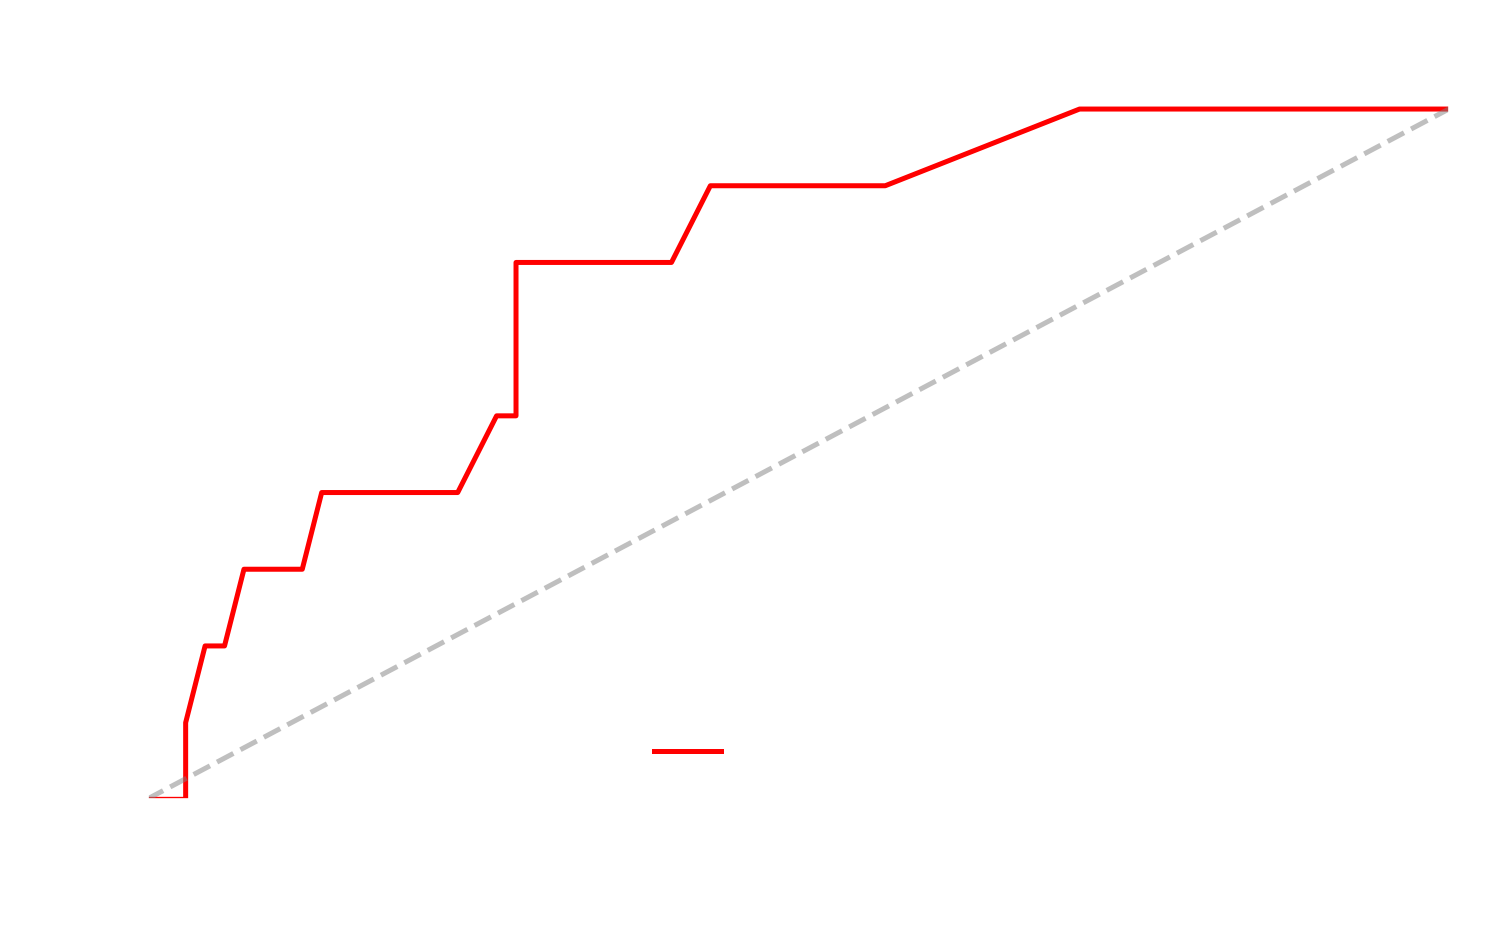

In [33]:
oscars_all = pd.read_excel('data/Oscars.xlsx').set_index(['Year', 'Title'])
oscars_train = oscars_all.loc[oscars_all['Partition'] == 't'].drop(columns='Partition')
oscars_test = oscars_all.loc[oscars_all['Partition'] == 'v'].drop(columns='Partition')
oscars_train['intercept'] = 1
oscars_test['intercept'] = 1

oscars_train.drop(columns='Comedy', inplace=True, errors='ignore')
oscars_test.drop(columns='Comedy', inplace=True, errors='ignore')

mymodel2 = sm .Logit(oscars_train['Winner'], oscars_train[[c for c in oscars_train if c != 'Winner']]).fit()

logit_roc_auc = roc_auc_score(oscars_test['Winner'], mymodel2.predict(oscars_test[[c for c in oscars_test if c != 'Winner']]))
fpr, tpr, thresholds = roc_curve(oscars_test['Winner'], mymodel2.predict(oscars_test[[c for c in oscars_test if c != 'Winner']]))
plt.figure()
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(logit_roc_auc),color='red')
plt.plot([0, 1], [0, 1],color='grey',alpha=.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logit DanaValidation Dropped_Yes')
plt.legend(loc='lower center')
plt.show()

### Explanation
Area under the curve has improved to 0.76. Due to a higher AUC value and the fact that the
model is simpler, the second evaluated Logistic Model is the superior model.

### 4.4.6 Using a Default Cut-off Value
Using a default cut-off value of 0.5, what are the sensitivity, specificity, and total accuracy of the
logistic regression model on the validation set? Why is sensitivity a good metric to use for this
problem? Use the confusion_matrix and classification_report functions on the evaluated model
to view the sensitivity and other accuracy metrics.

In [34]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

oscars_all = pd.read_excel('data//Oscars.xlsx').set_index(['Year','Title'])
oscars_train = oscars_all.loc[oscars_all['Partition'] == 't'].drop(columns='Partition')
oscars_test = oscars_all.loc[oscars_all['Partition'] == 'v'].drop(columns='Partition')
oscars_train['intercept'] = 1
oscars_test['intercept'] = 1
oscars_train.drop(columns='Comedy',inplace=True,errors='ignore')
oscars_test.drop(columns='Comedy',inplace=True,errors='ignore')
mymodel2 = sm.Logit(oscars_train['Winner'],oscars_train[ [c for c in oscars_train if c != 'Winner']
]).fit()

cm = confusion_matrix(oscars_test['Winner'],round(mymodel2.predict(oscars_test[[c for c in oscars_test if c != 'Winner']])))
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
 
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity)
print('Specificity : ', specificity)
print(classification_report(oscars_test['Winner'],round(mymodel2.predict(oscars_test[[c for c in oscars_test if c != 'Winner']]))))

Optimization terminated successfully.
         Current function value: 0.315266
         Iterations 7
Accuracy :  0.8552631578947368
Sensitivity :  0.9402985074626866
Specificity :  0.2222222222222222
              precision    recall  f1-score   support

           0       0.90      0.94      0.92        67
           1       0.33      0.22      0.27         9

    accuracy                           0.86        76
   macro avg       0.62      0.58      0.59        76
weighted avg       0.83      0.86      0.84        76



### Explanation
Sensitivity = 1 ' Class 1 error rate = 1 ' 0.778 = 22.2%. Of the nine Oscar winners in the
validation set, the model correctly identifies two of them. Sensitivity is a good measure to
evaluate a model for this problem as we are most interested in identifying the annual winner.
However, a sensitivity of 22% corresponding to the default cutoff value of 0.5 is very low
suggesting that a different (lower) cutoff value should be used.

### 4.4.7 Using the Model to Predict the Annual Winner
What is the best way to use the model to predict the annual winner? For the validation set, how
often is the actual winner deemed "most likely" to win out of each year's nominees?

In [35]:
oscars_all = pd.read_excel('data//Oscars.xlsx').set_index(['Year','Title'])
oscars_train = oscars_all.loc[oscars_all['Partition'] == 't'].drop(columns='Partition')
oscars_test = oscars_all.loc[oscars_all['Partition'] == 'v'].drop(columns='Partition')
oscars_train['intercept'] = 1
oscars_test['intercept'] = 1
oscars_train.drop(columns='Comedy',inplace=True,errors='ignore')
oscars_test.drop(columns='Comedy',inplace=True,errors='ignore')
mymodel2 = sm.Logit(oscars_train['Winner'],oscars_train[ [c for c in oscars_train if c != 'Winner']
]).fit()

oscars_test['LogitPred'] = mymodel2.predict(oscars_test[ ['OscarNominations','GoldenGlobeWins','intercept'] ])
data = oscars_test.sort_values(['Year','LogitPred'],ascending=False).head(15)
print(data)

Optimization terminated successfully.
         Current function value: 0.315266
         Iterations 7
                            OscarNominations  GoldenGlobeWins  Winner  \
Year Title                                                              
2016 La La Land                           14                7       0   
     Moonlight                             8                1       1   
     Arrival                               8                0       0   
     Manchester by the Sea                 6                1       0   
     Hacksaw Ridge                         6                0       0   
     Lion                                  6                0       0   
     Fences                                4                1       0   
     Hell or High Water                    4                0       0   
     Hidden Figures                        3                0       0   
2015 The Revenant                         12                3       0   
     The Martian      

### Explanation
The best way to use the model to predict the annual winner for each year is to identify the
movie with the highest probability of being the winner and make that the model's sole 'pick' for
the winner. A portion of the scoring output using the logistic regression model with
OscarNominations and GoldenGlobeWins as independent variables appears below.
Based on the results shown above for 2016 and 2015, we would identify La La Land as the
2016 movie most likely to win and The Revenant as the 2015 movie most likely to win. Doing
this for all movies in the Validation set results in identifying three correct winners (Slumdog
Millionaire, The Artist, and Birdman) in the nine years of validation data. That is, the sensitivity
of the model is (3/9) = 33.3%. The analyst should perhaps consider additional variables to
classify Best Picture Oscar winners.